<a href="https://colab.research.google.com/github/Viny2030/Aconcagua/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

### Importing the Necessary Libraries

In [1]:
!pip install pycaret[full]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
mpl.rcParams['figure.dpi'] = 300

### Loading the Dataset

In [3]:
data = get_data('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Exploratory Data Analysis

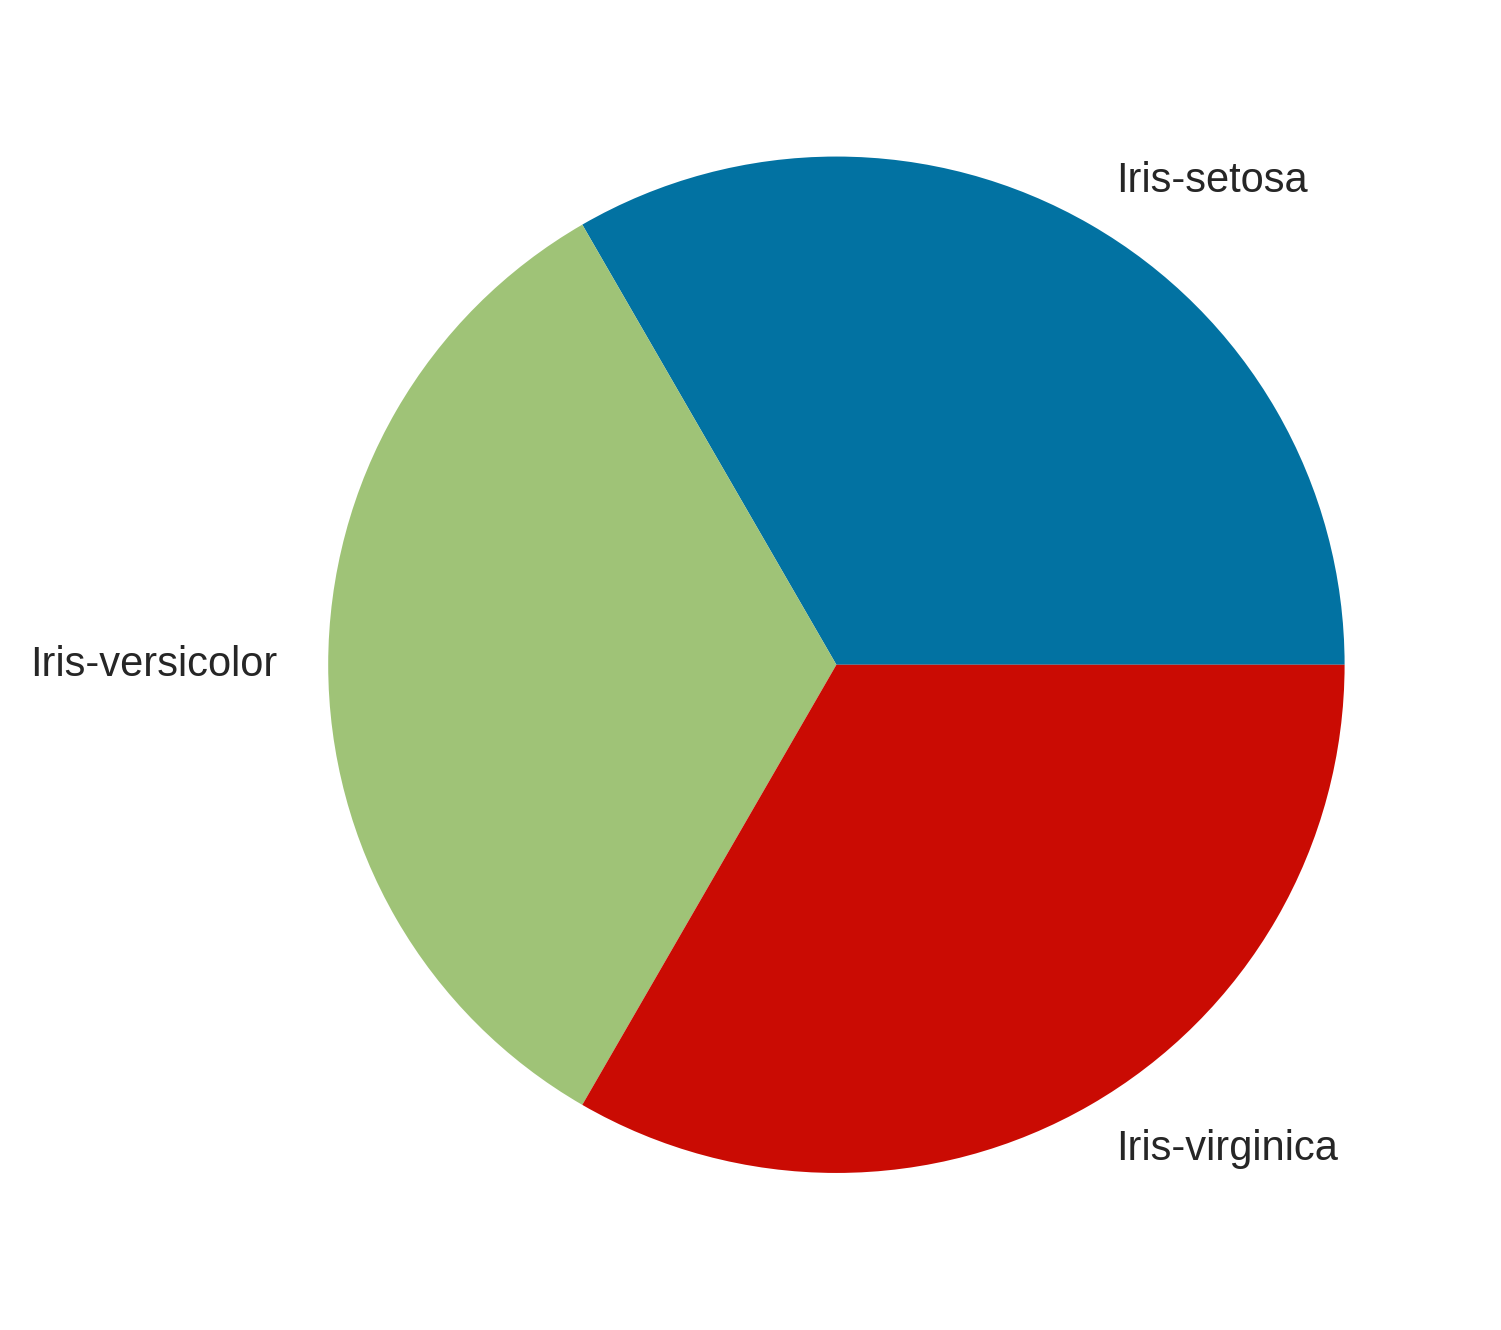

In [5]:
data['species'].value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

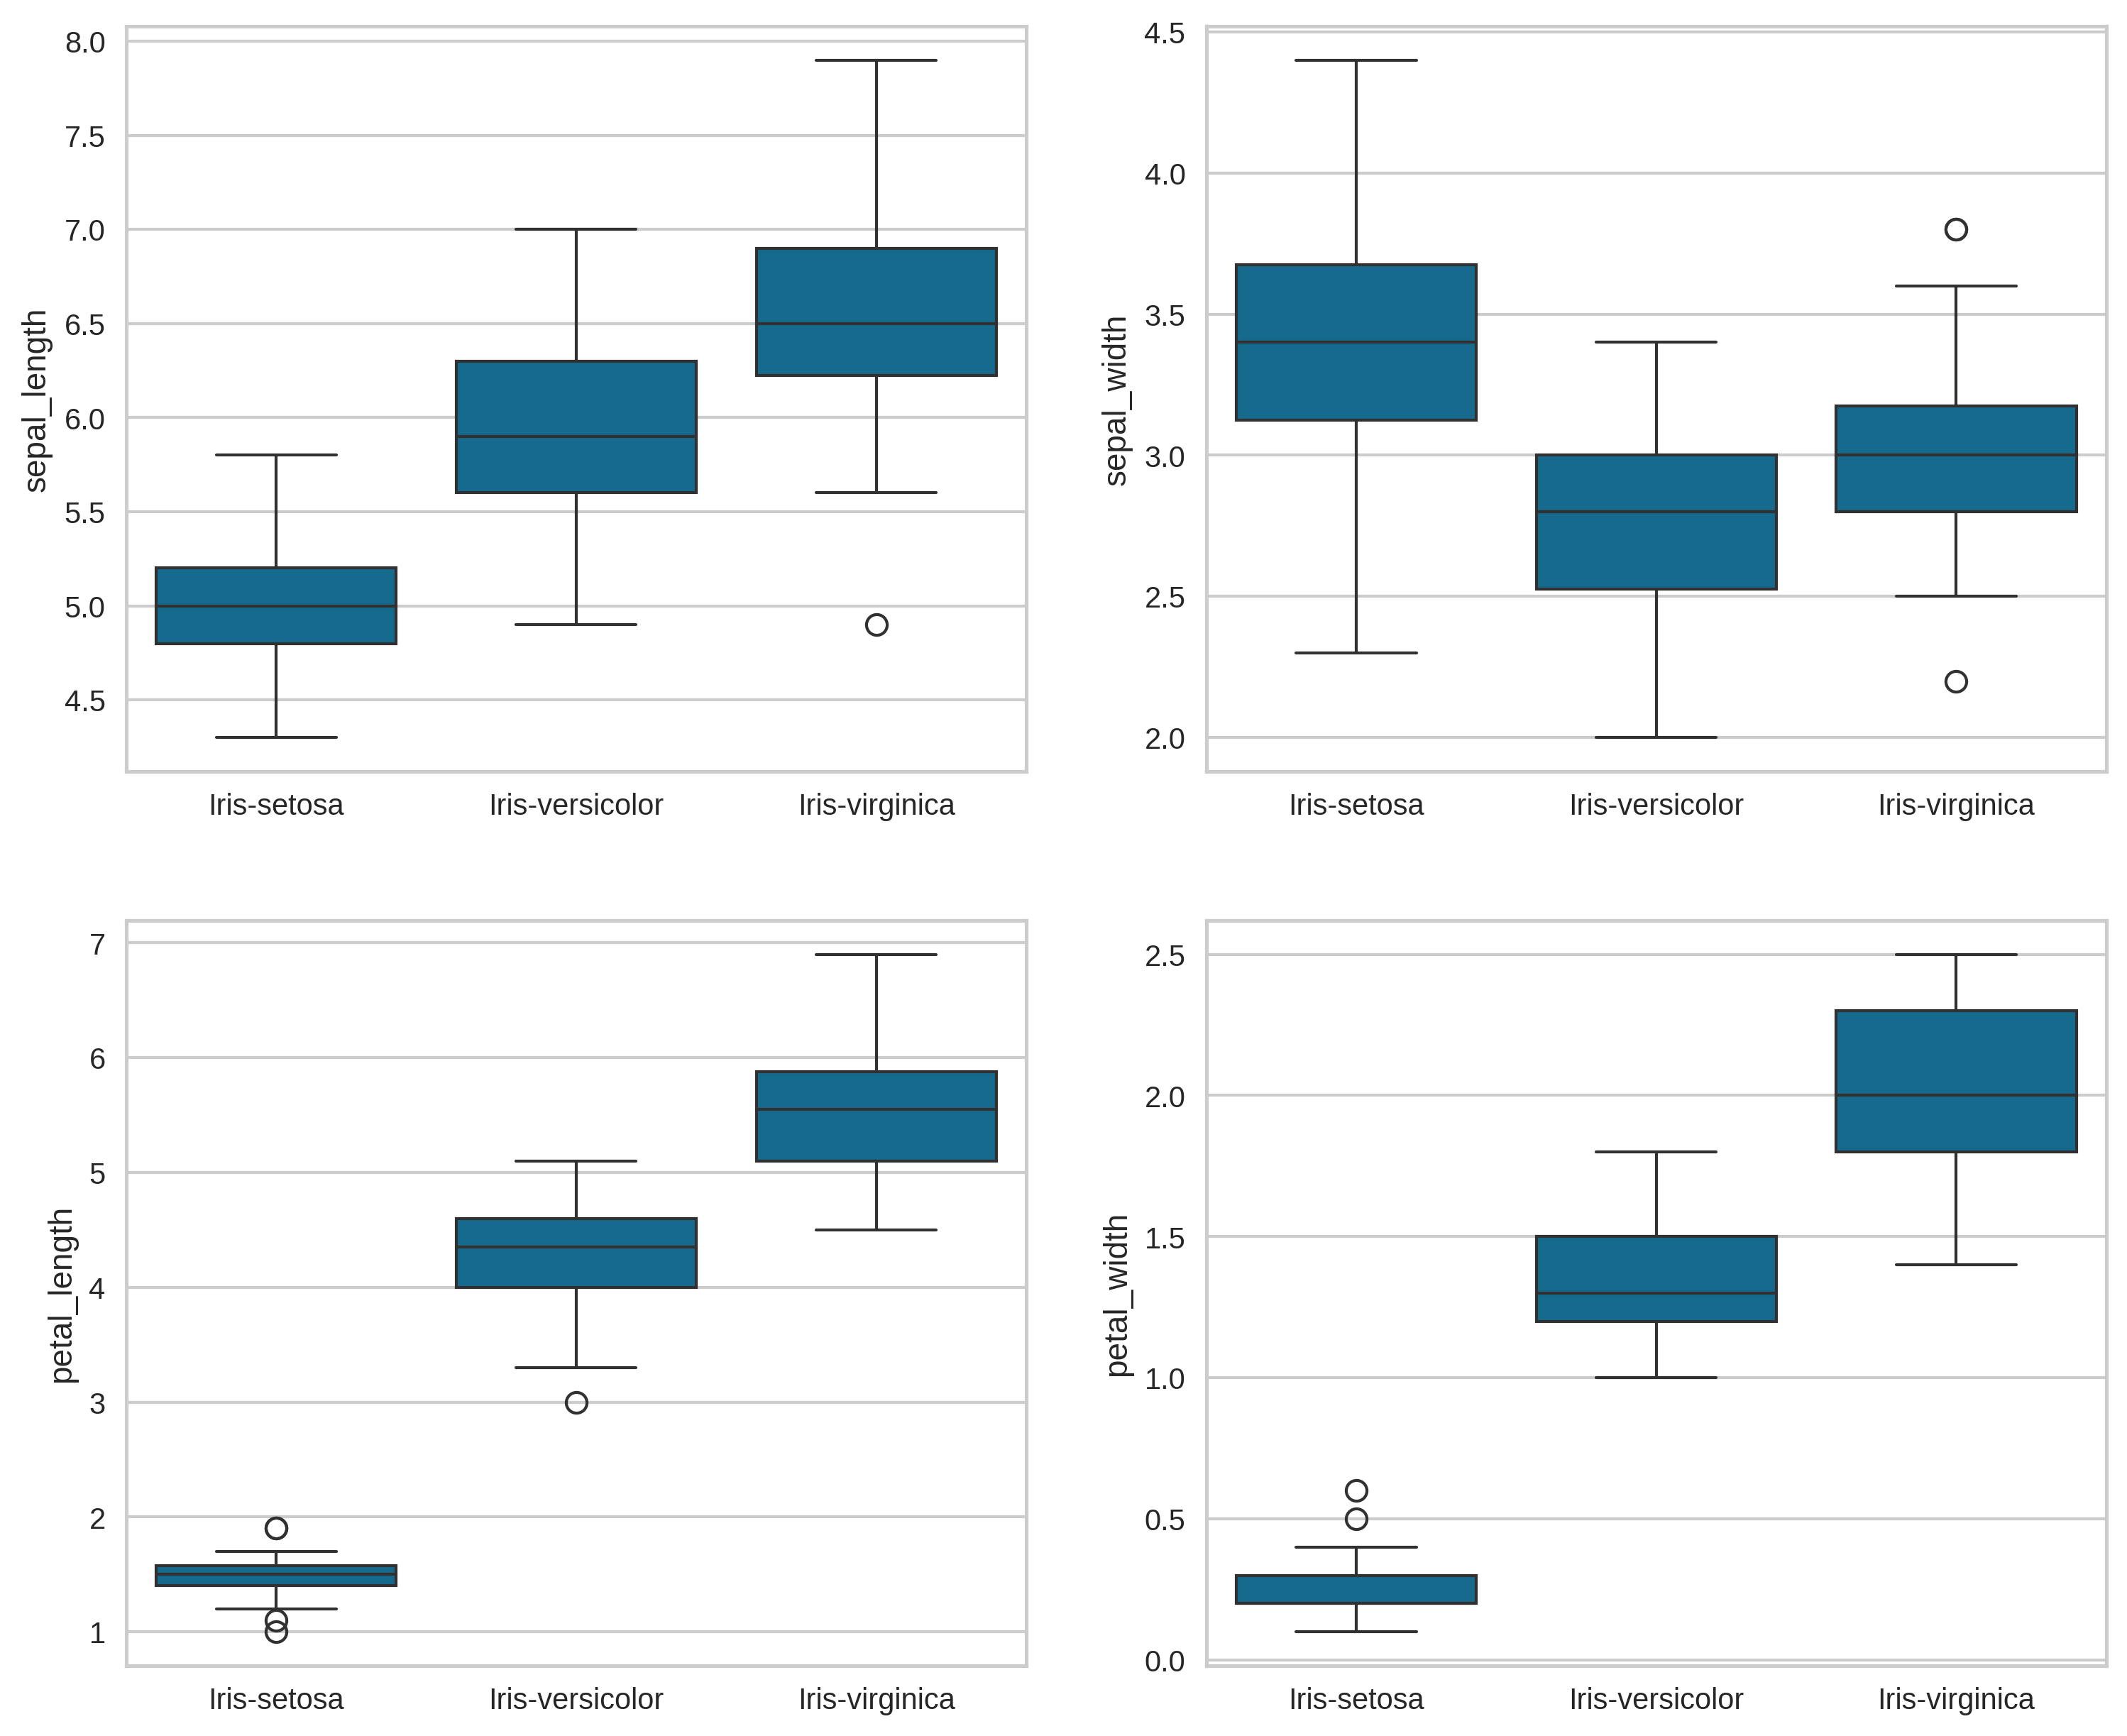

In [6]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

for ax, col in zip(axes.flatten(), data.columns) :
    sns.boxplot(data = data, x = 'species', y = col, ax = ax)
    ax.set_xlabel('')

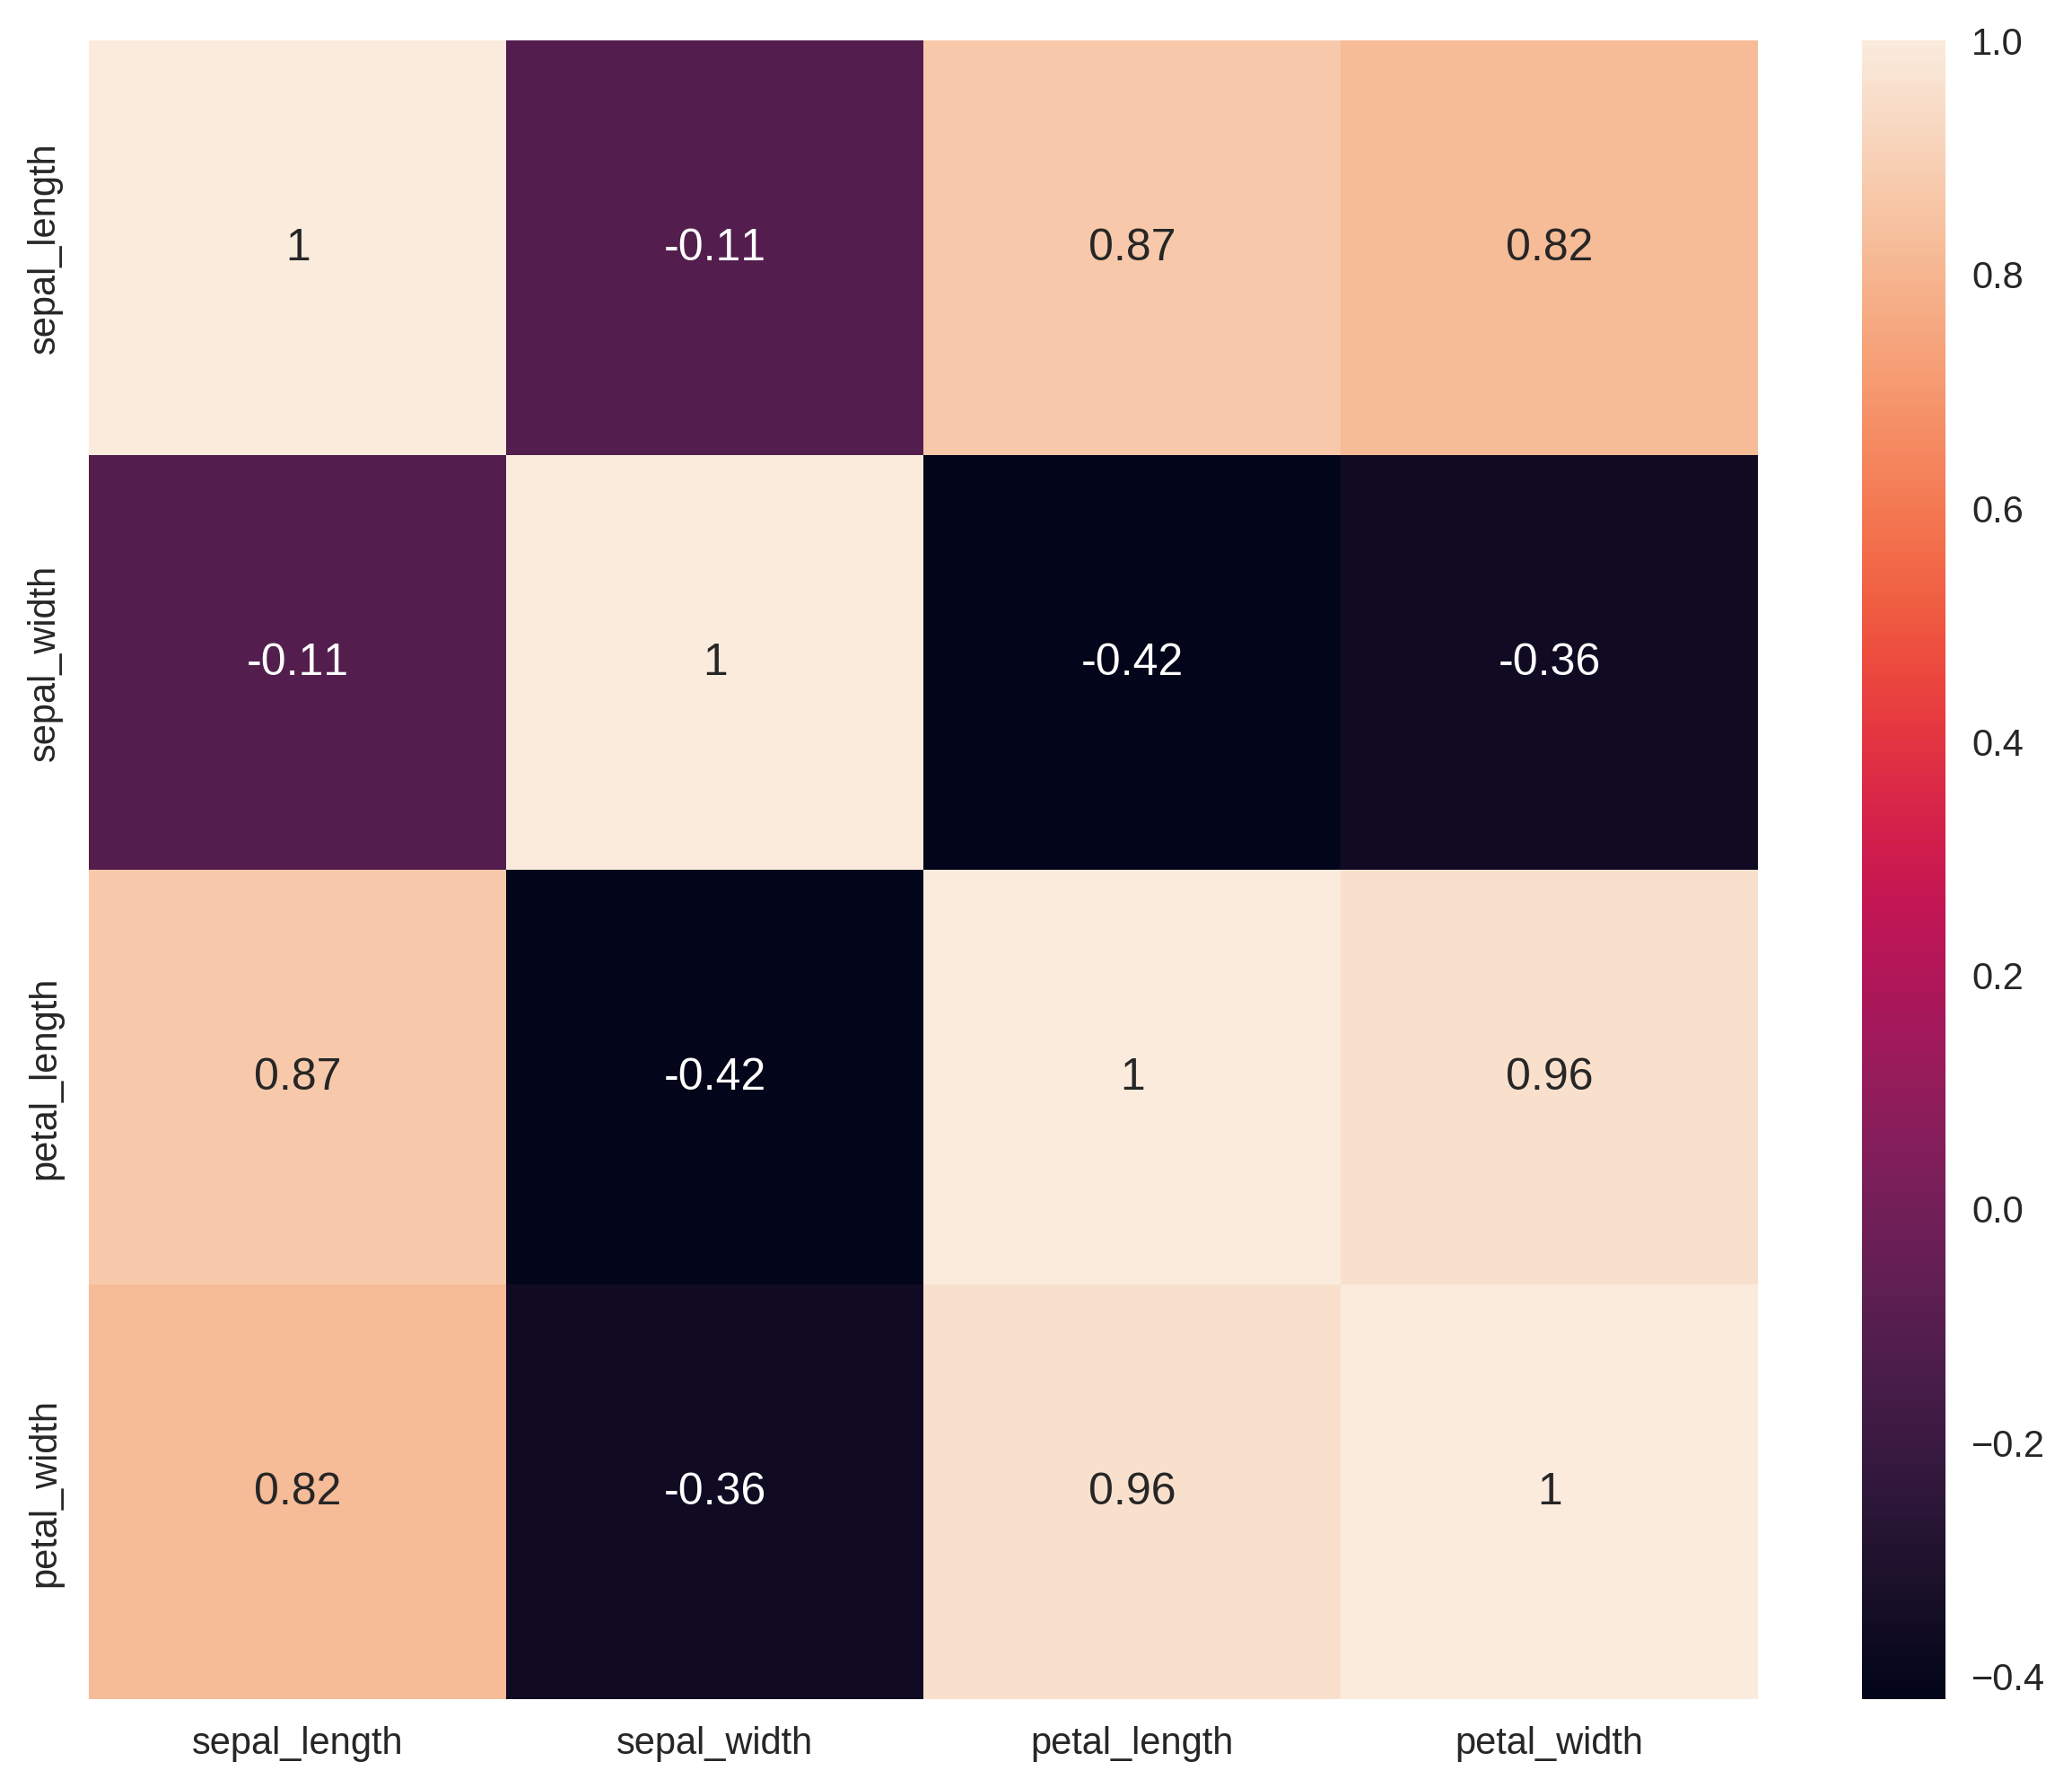

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(columns=['species']).corr().round(decimals=2), annot=True)
plt.show()

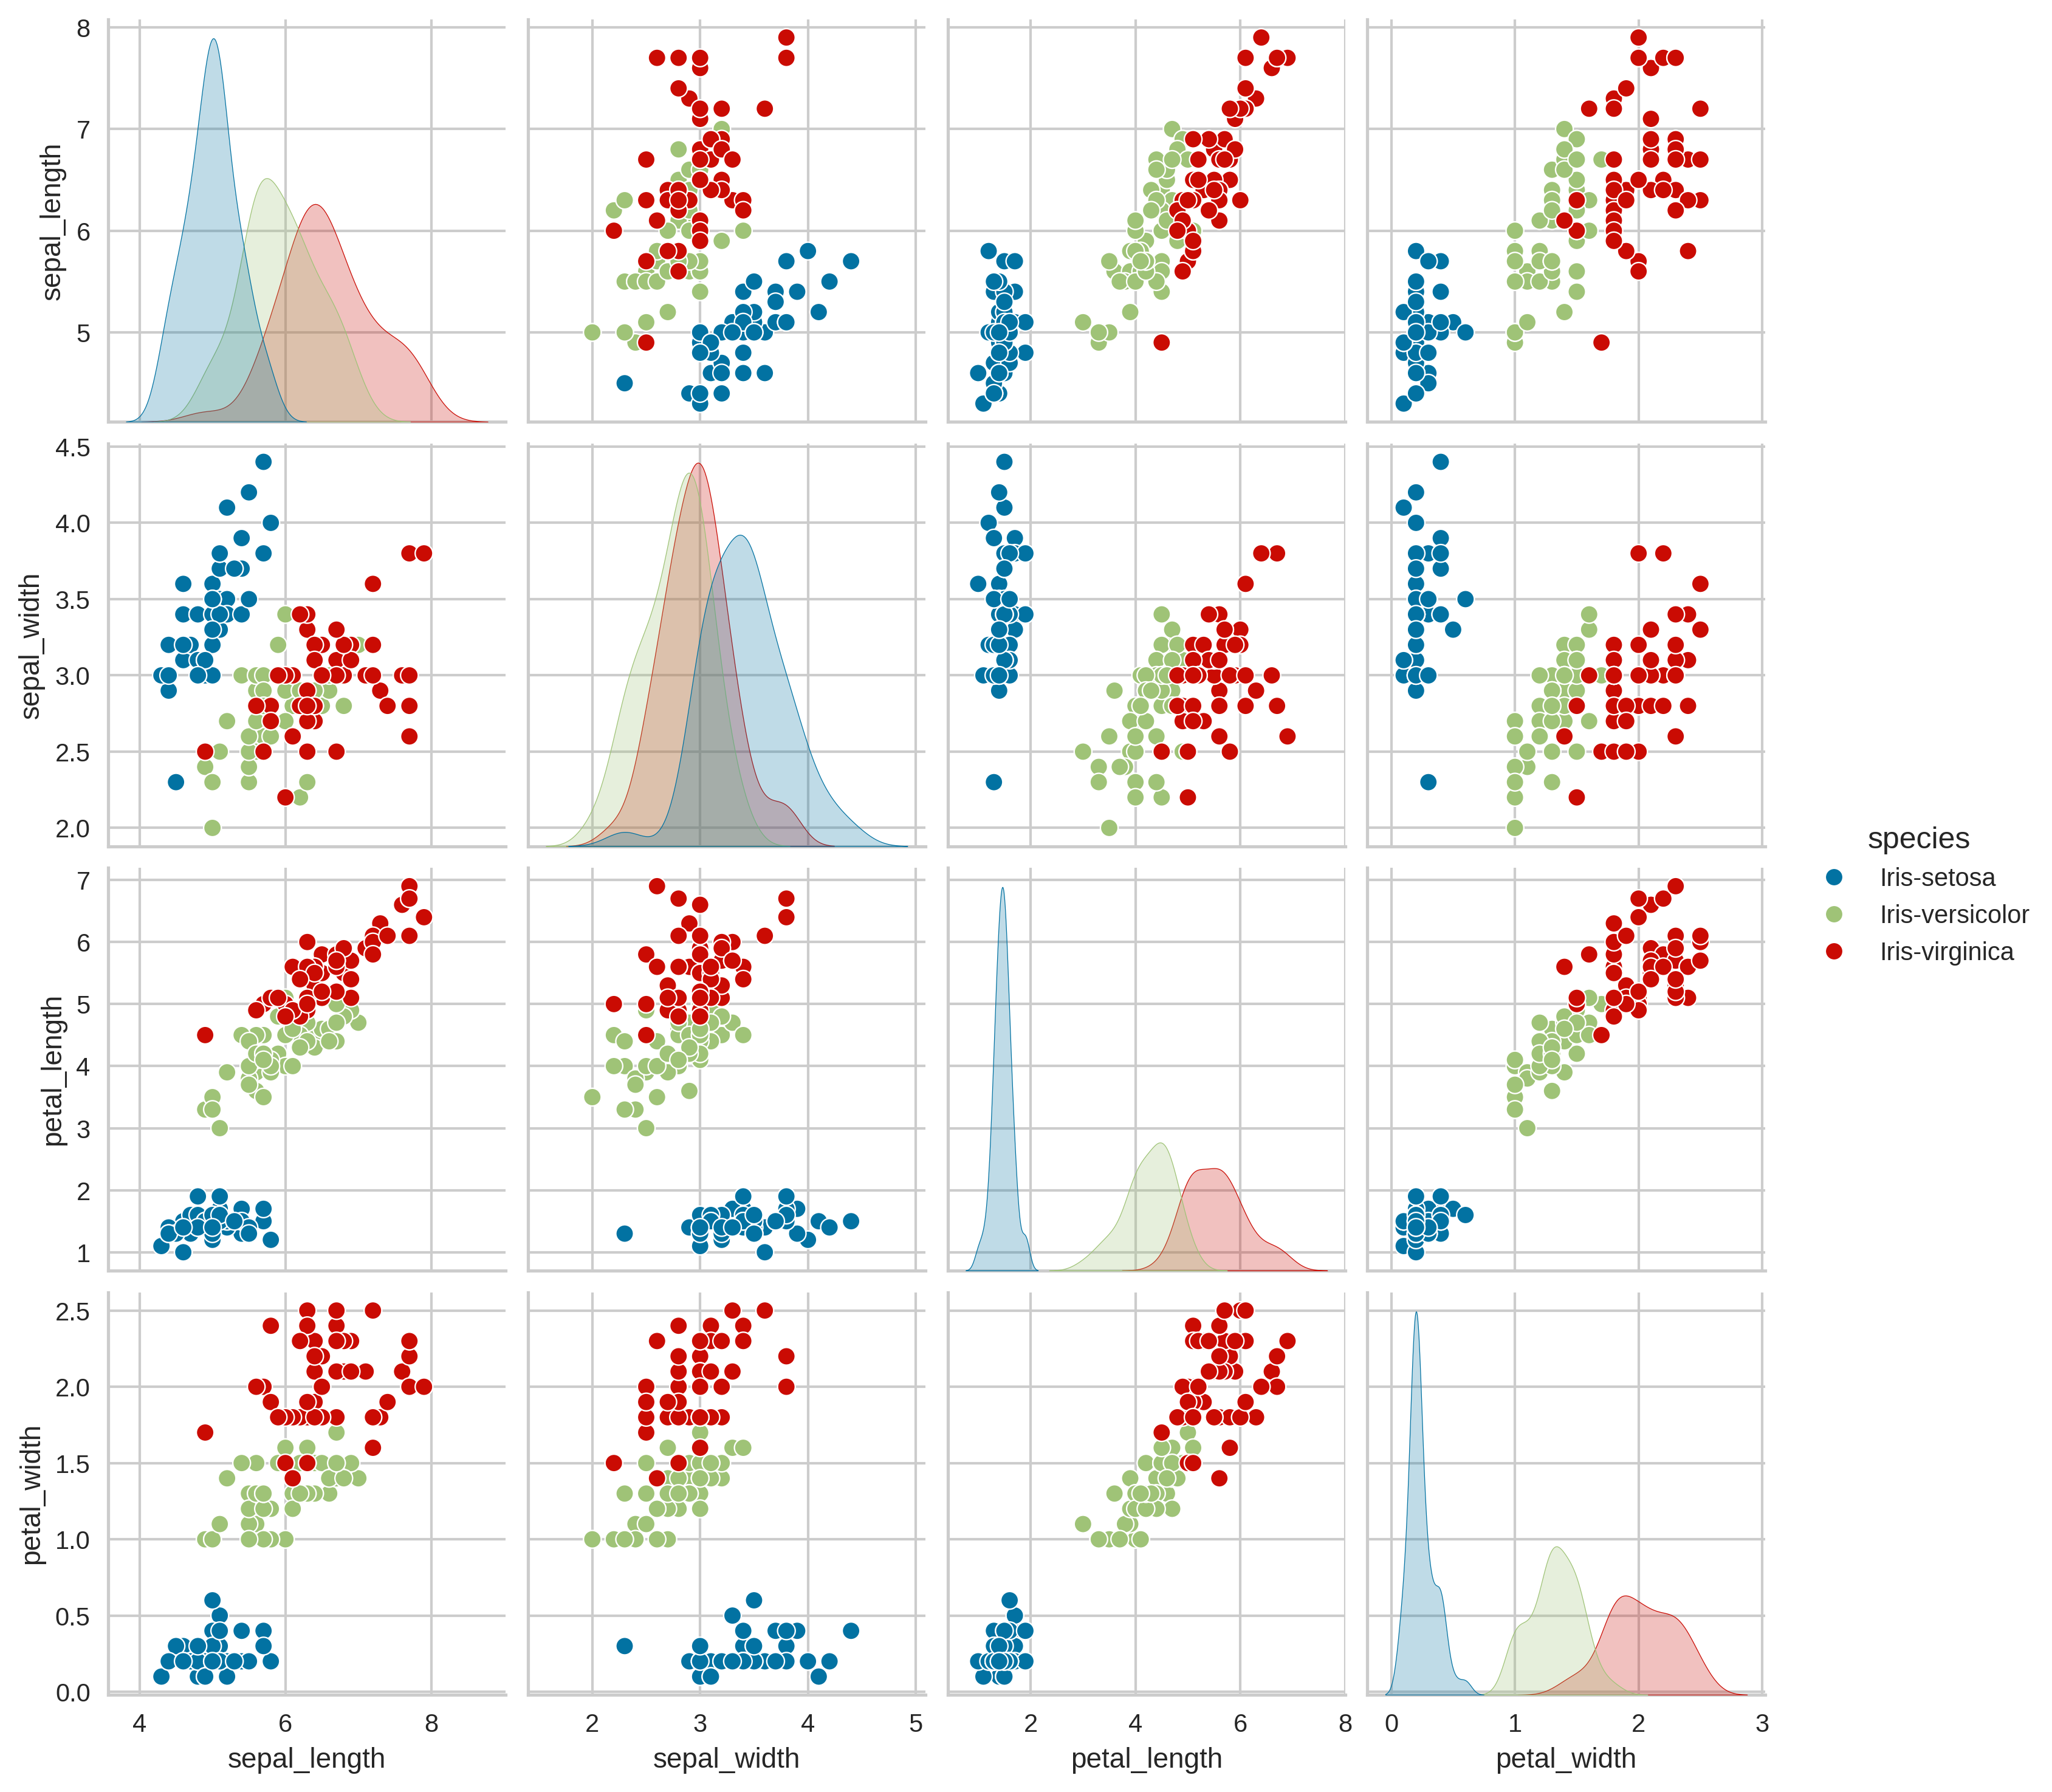

In [8]:
sns.pairplot(data, hue='species')
plt.show()

### Initializing the PyCaret Environment

In [9]:
classf = setup(data = data, target = 'species', train_size = 0.8,
               normalize = True, session_id = 3934)

,Description,Value
0,Session id,3934
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(120, 5)"
7,Transformed test set shape,"(30, 5)"
8,Numeric features,4
9,Preprocess,True


### Comparing Classification Models

In [10]:
compare_models(sort = 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9833,0.0000,0.9833,0.9867,0.9831,0.9750,0.9769,0.0320
qda,Quadratic Discriminant Analysis,0.9750,0.0000,0.9750,0.9822,0.9738,0.9625,0.9668,0.0510
lr,Logistic Regression,0.9667,0.0000,0.9667,0.9733,0.9661,0.9500,0.9537,0.8600
knn,K Neighbors Classifier,0.9667,0.9979,0.9667,0.9756,0.9653,0.9500,0.9552,0.0480
gbc,Gradient Boosting Classifier,0.9667,0.0000,0.9667,0.9700,0.9664,0.9500,0.9519,0.2510
nb,Naive Bayes,0.9583,0.9938,0.9583,0.9689,0.9568,0.9375,0.9436,0.0320
et,Extra Trees Classifier,0.9583,0.9927,0.9583,0.9689,0.9568,0.9375,0.9436,0.1500
dt,Decision Tree Classifier,0.9500,0.9625,0.9500,0.9657,0.9455,0.9250,0.9346,0.0370
xgboost,Extreme Gradient Boosting,0.9500,0.9844,0.9500,0.9657,0.9455,0.9250,0.9346,0.0640
rf,Random Forest Classifier,0.9417,0.9917,0.9417,0.9467,0.9390,0.9125,0.9175,0.1980


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

### Creating the Model

In [11]:
model = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9167,0.0000,0.9167,0.9333,0.9153,0.8750,0.8843
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9167,0.0000,0.9167,0.9333,0.9153,0.8750,0.8843
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tuning the Model

In [12]:
!pip install catboost

In [13]:
from catboost import CatBoostClassifier

In [15]:
import numpy as np
import pandas as pd
from pycaret.classification import *

In [16]:
!pip freeze | grep catboost
!pip freeze | grep pycaret

catboost==1.2.7
pycaret==3.3.2


In [18]:
model_cat = create_model('catboost', verbose = False)

params = {'iterations': np.arange(100, 1000, 100),
         'max_depth': np.arange(1, 10),
         'learning_rate': np.arange(0.01, 1, 0.01),
         'random_strength': np.arange(0.1, 1.0, 0.1),
         'l2_leaf_reg': np.arange(1, 100),
         'border_count': np.arange(1, 256)}

tuned_model = tune_model(model_cat, optimize = 'Accuracy', fold = 10,
            tuner_verbose = False, search_library = 'scikit-optimize',
            custom_grid = params, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9167,1.0000,0.9167,0.9333,0.9153,0.8750,0.8843
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.8333,0.9896,0.8333,0.8889,0.8222,0.7500,0.7833
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

In [23]:
model_qda = create_model('qda', verbose = False)

params = {
    # Remove 'priors' from the search space as it's not a hyperparameter to tune
    'reg_param':  [0.0, 1.0],  # Use Integer for integer ranges
    # Remove 'tol' as it's not a hyperparameter to tune
}
tuned_model = tune_model(model_qda, optimize = 'Accuracy', fold = 10,
            tuner_verbose = False, search_library = 'scikit-optimize',
            custom_grid = params, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8333,0.0000,0.8333,0.8889,0.8222,0.7500,0.7833
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9167,0.0000,0.9167,0.9333,0.9153,0.8750,0.8843
8,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


### Making Predictions

In [24]:
predictions = predict_model(model)

predictions.head(10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9667,1.0000,0.9667,0.9697,0.9666,0.9500,0.9516


,sepal_length,sepal_width,petal_length,petal_width,species,prediction_label,prediction_score
47,4.6,3.2,1.4,0.2,Iris-setosa,Iris-setosa,1.0000
9,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
53,5.5,2.3,4.0,1.3,Iris-versicolor,Iris-versicolor,0.9996
131,7.9,3.8,6.4,2.0,Iris-virginica,Iris-virginica,0.9994
109,7.2,3.6,6.1,2.5,Iris-virginica,Iris-virginica,1.0000
37,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
57,4.9,2.4,3.3,1.0,Iris-versicolor,Iris-versicolor,1.0000
31,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa,1.0000
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
141,6.9,3.1,5.1,2.3,Iris-virginica,Iris-virginica,0.9992


### Plotting the Model

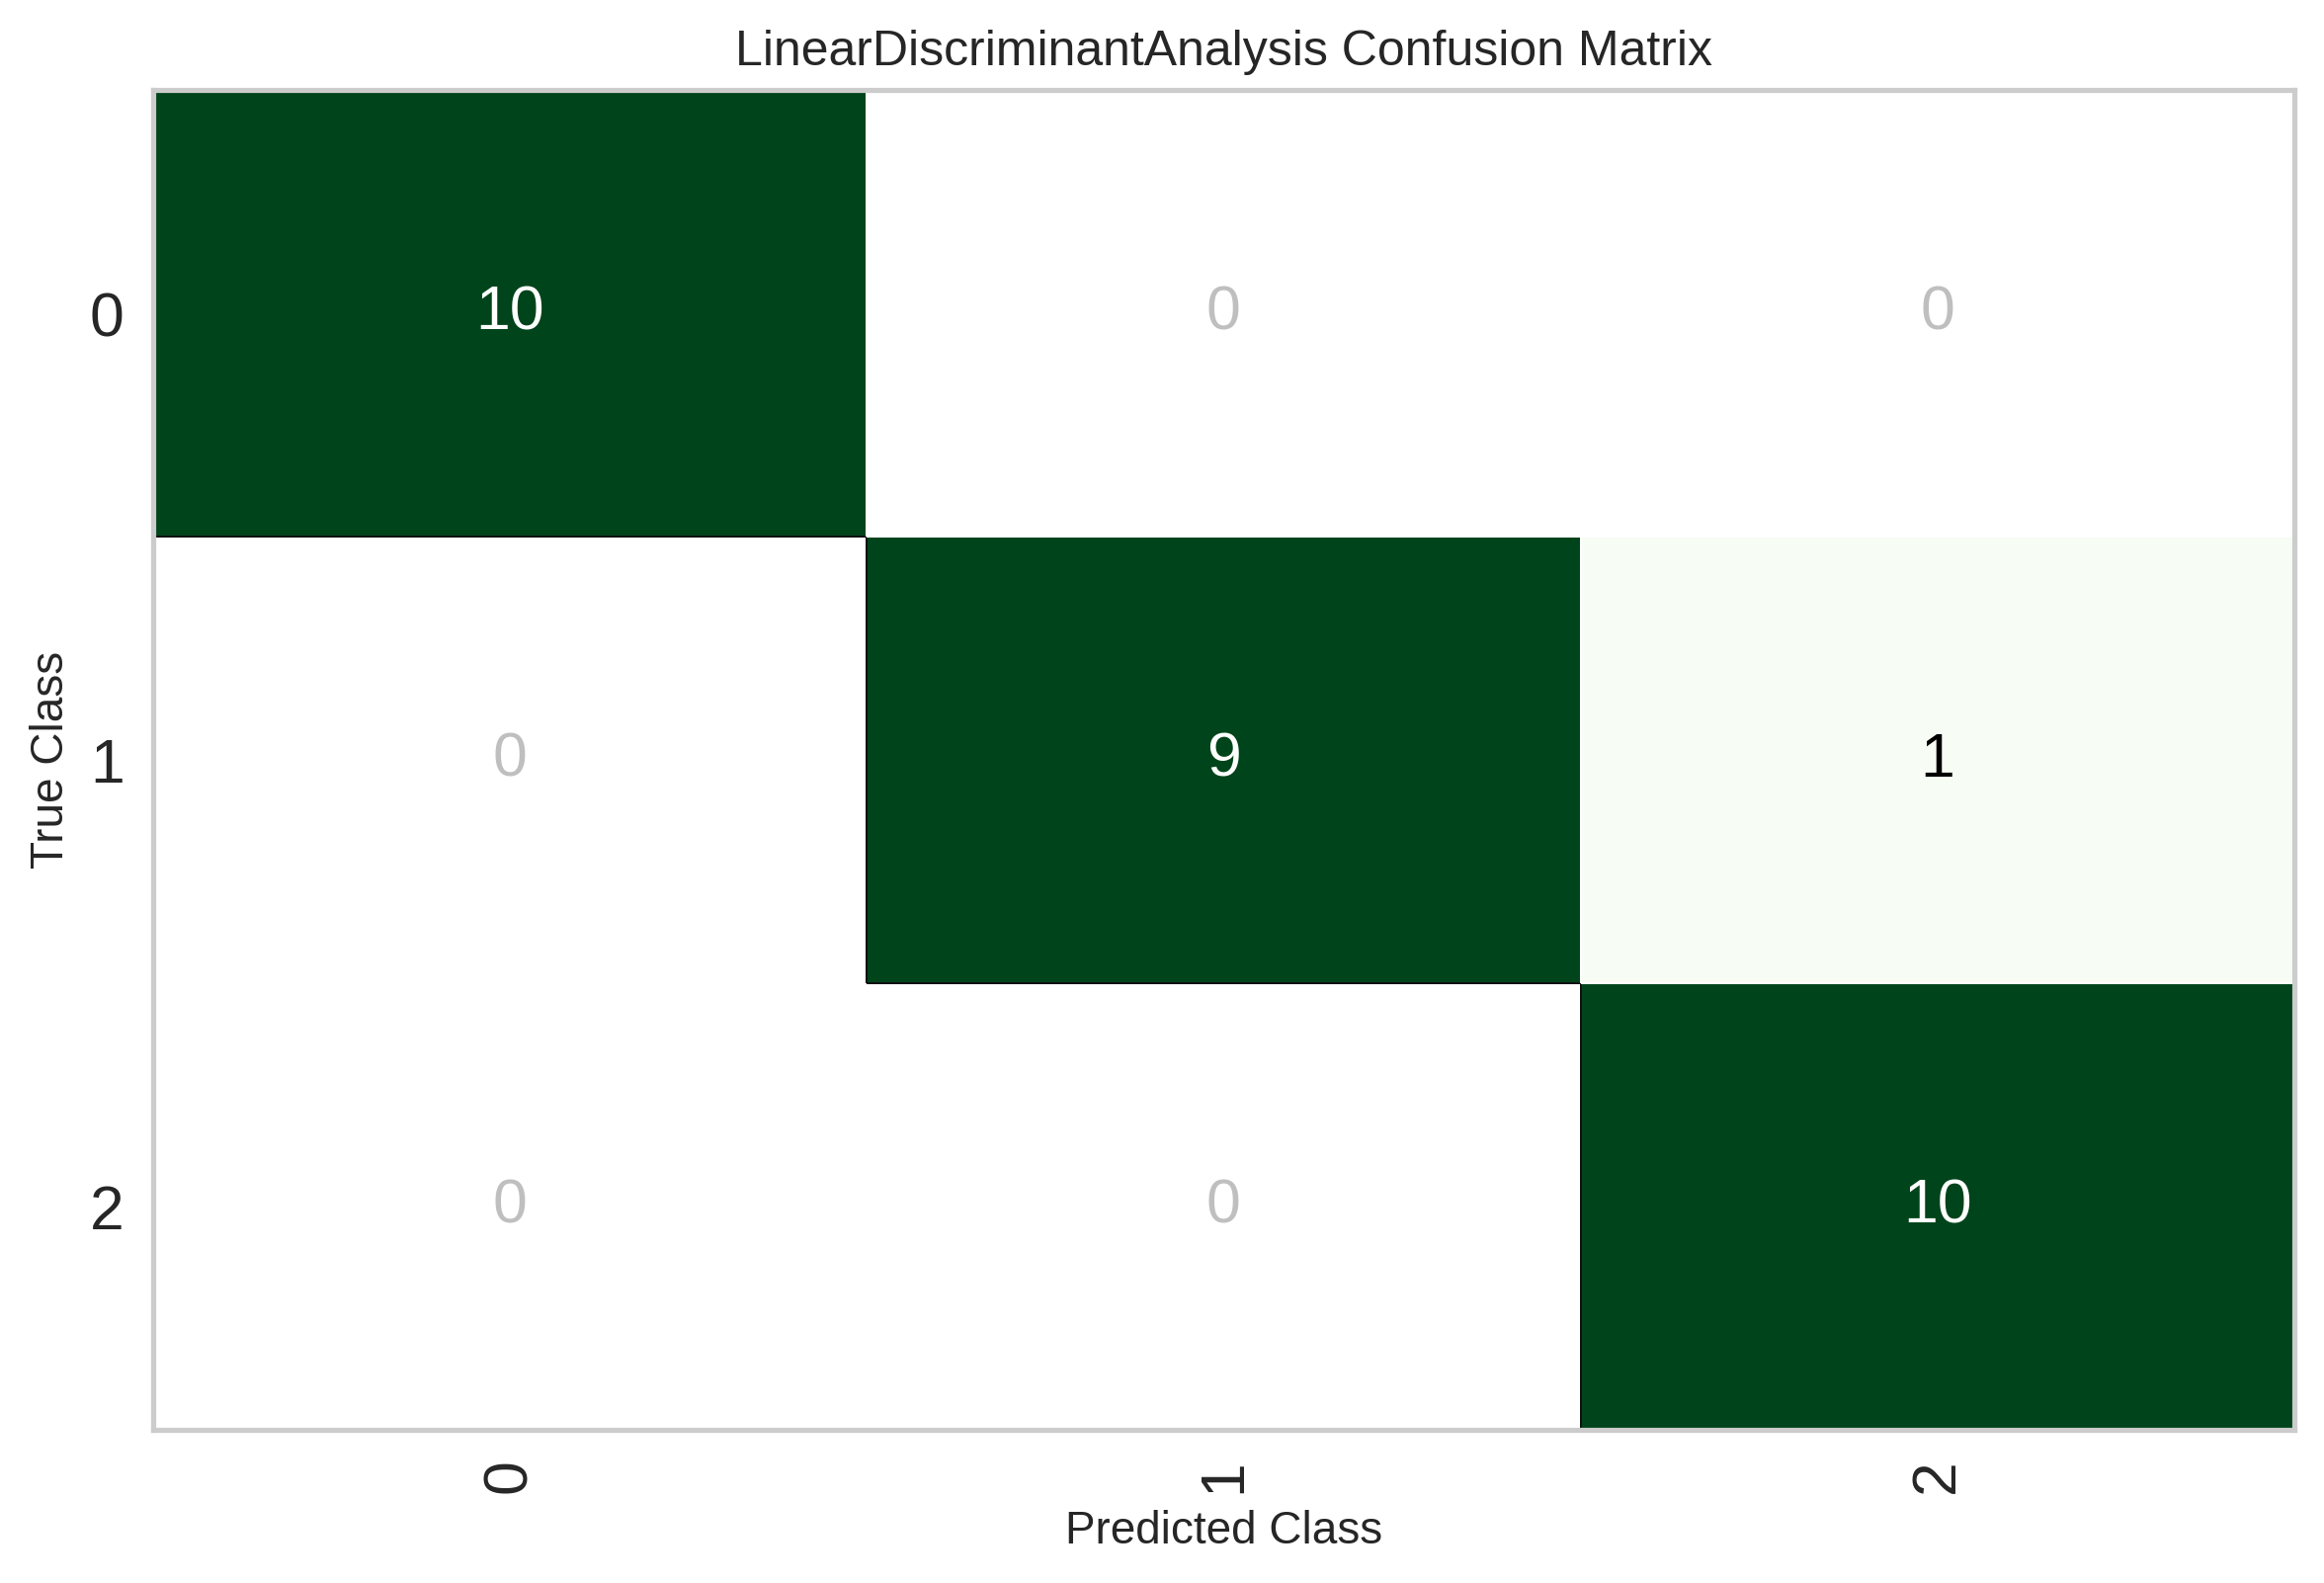

In [25]:
plot_model(model, 'confusion_matrix')

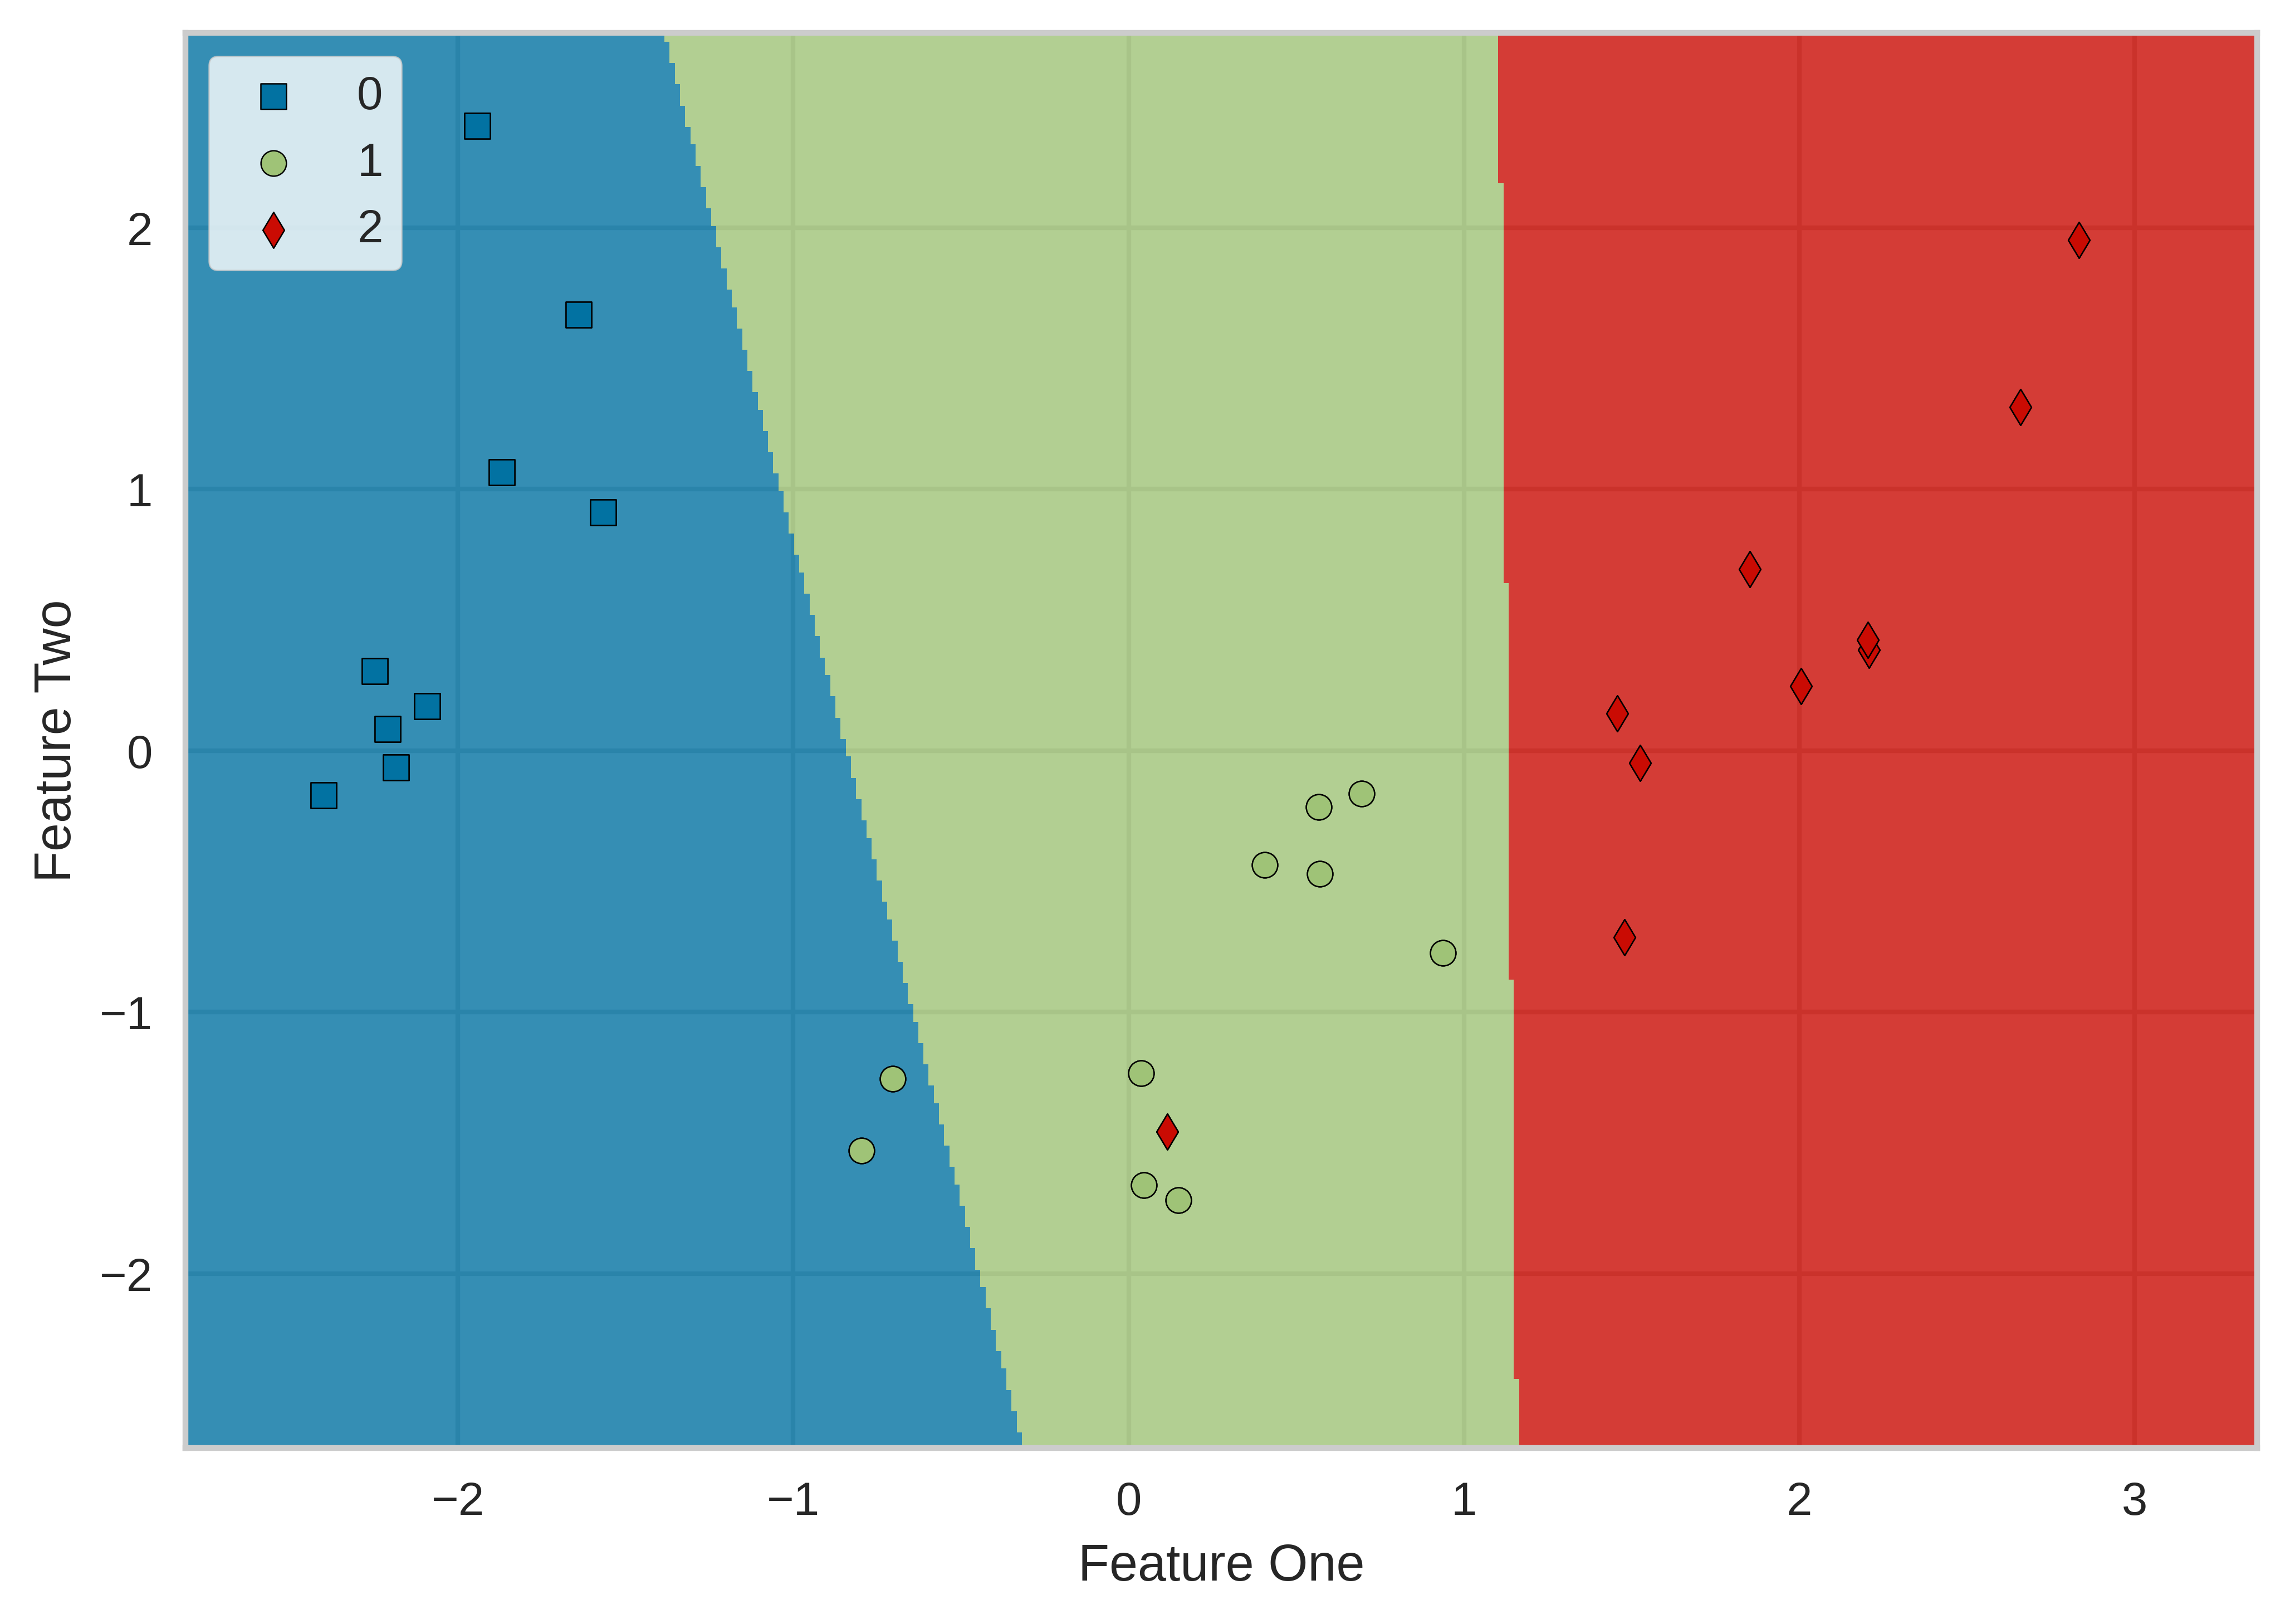

In [26]:
plot_model(model, 'boundary', scale = 2)

### Finalizing and Saving the Model

In [27]:
final_model = finalize_model(model)

save_model(final_model, 'classification_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal_length', 'sepal_width',
                                              'petal_length', 'petal_width'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empt...
                                                               missing_values=nan,
                                                               strategy='most_frequent'))),
                 ('normalize',
     

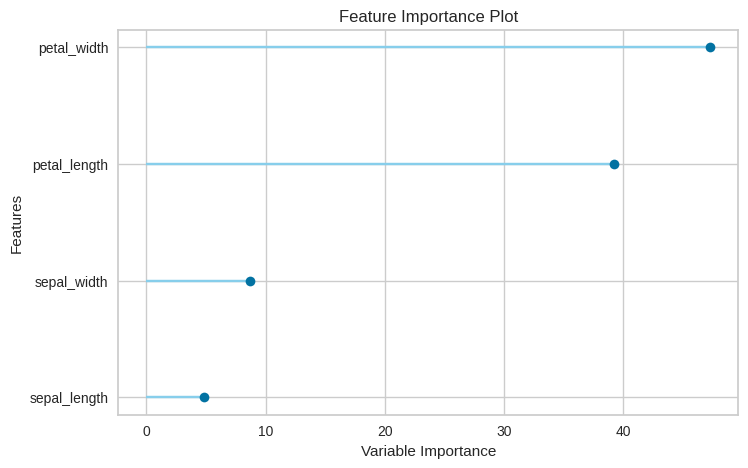

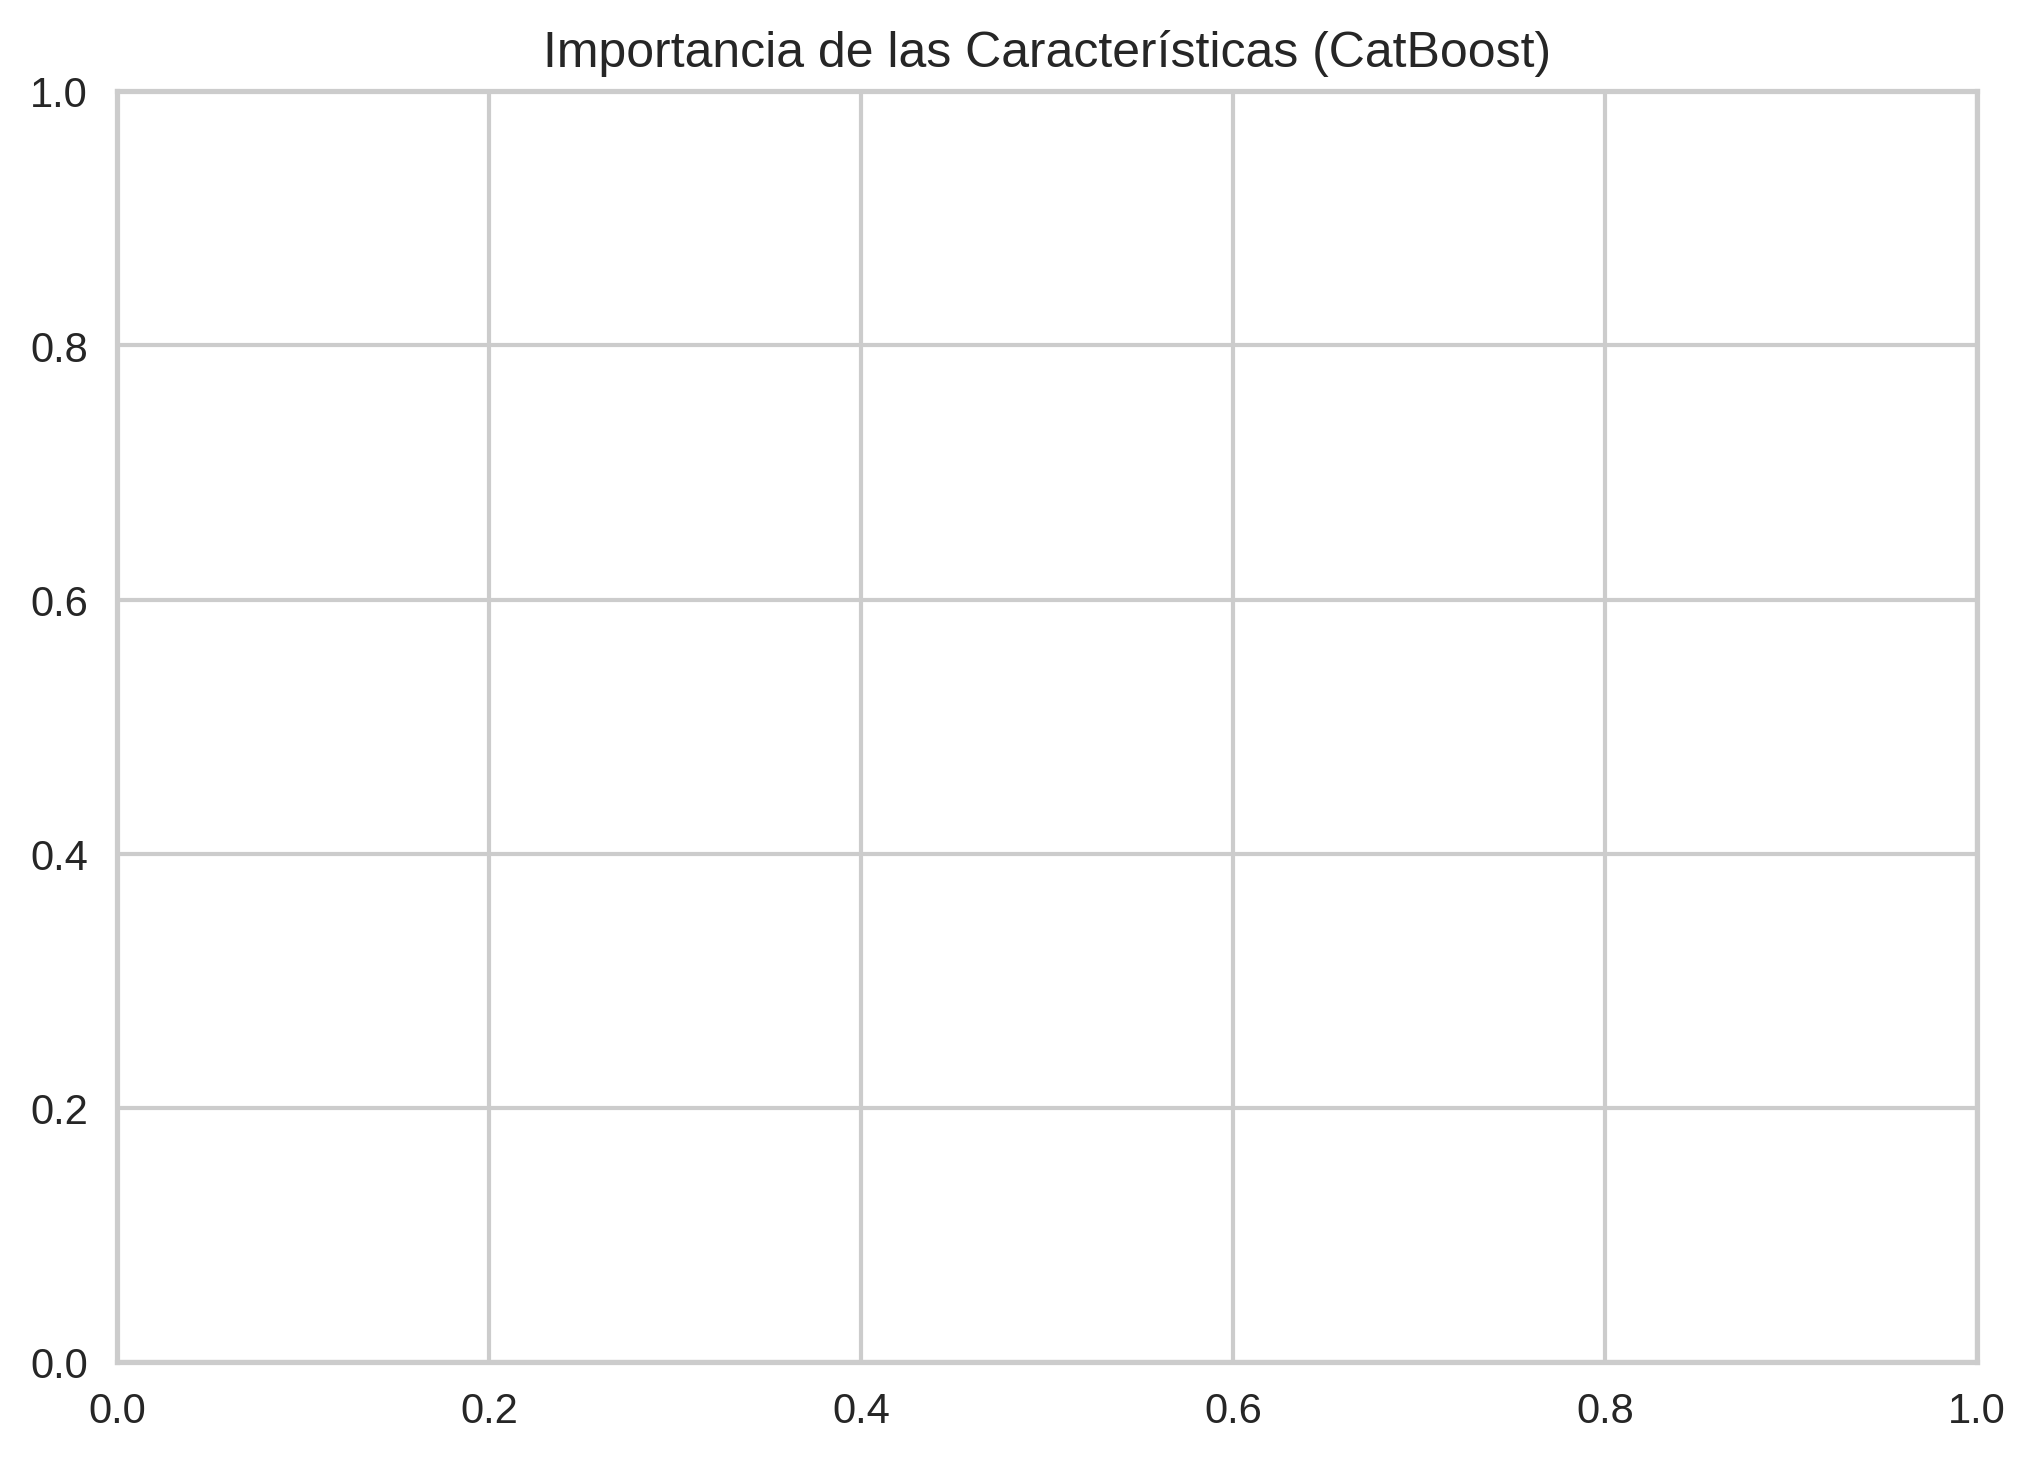

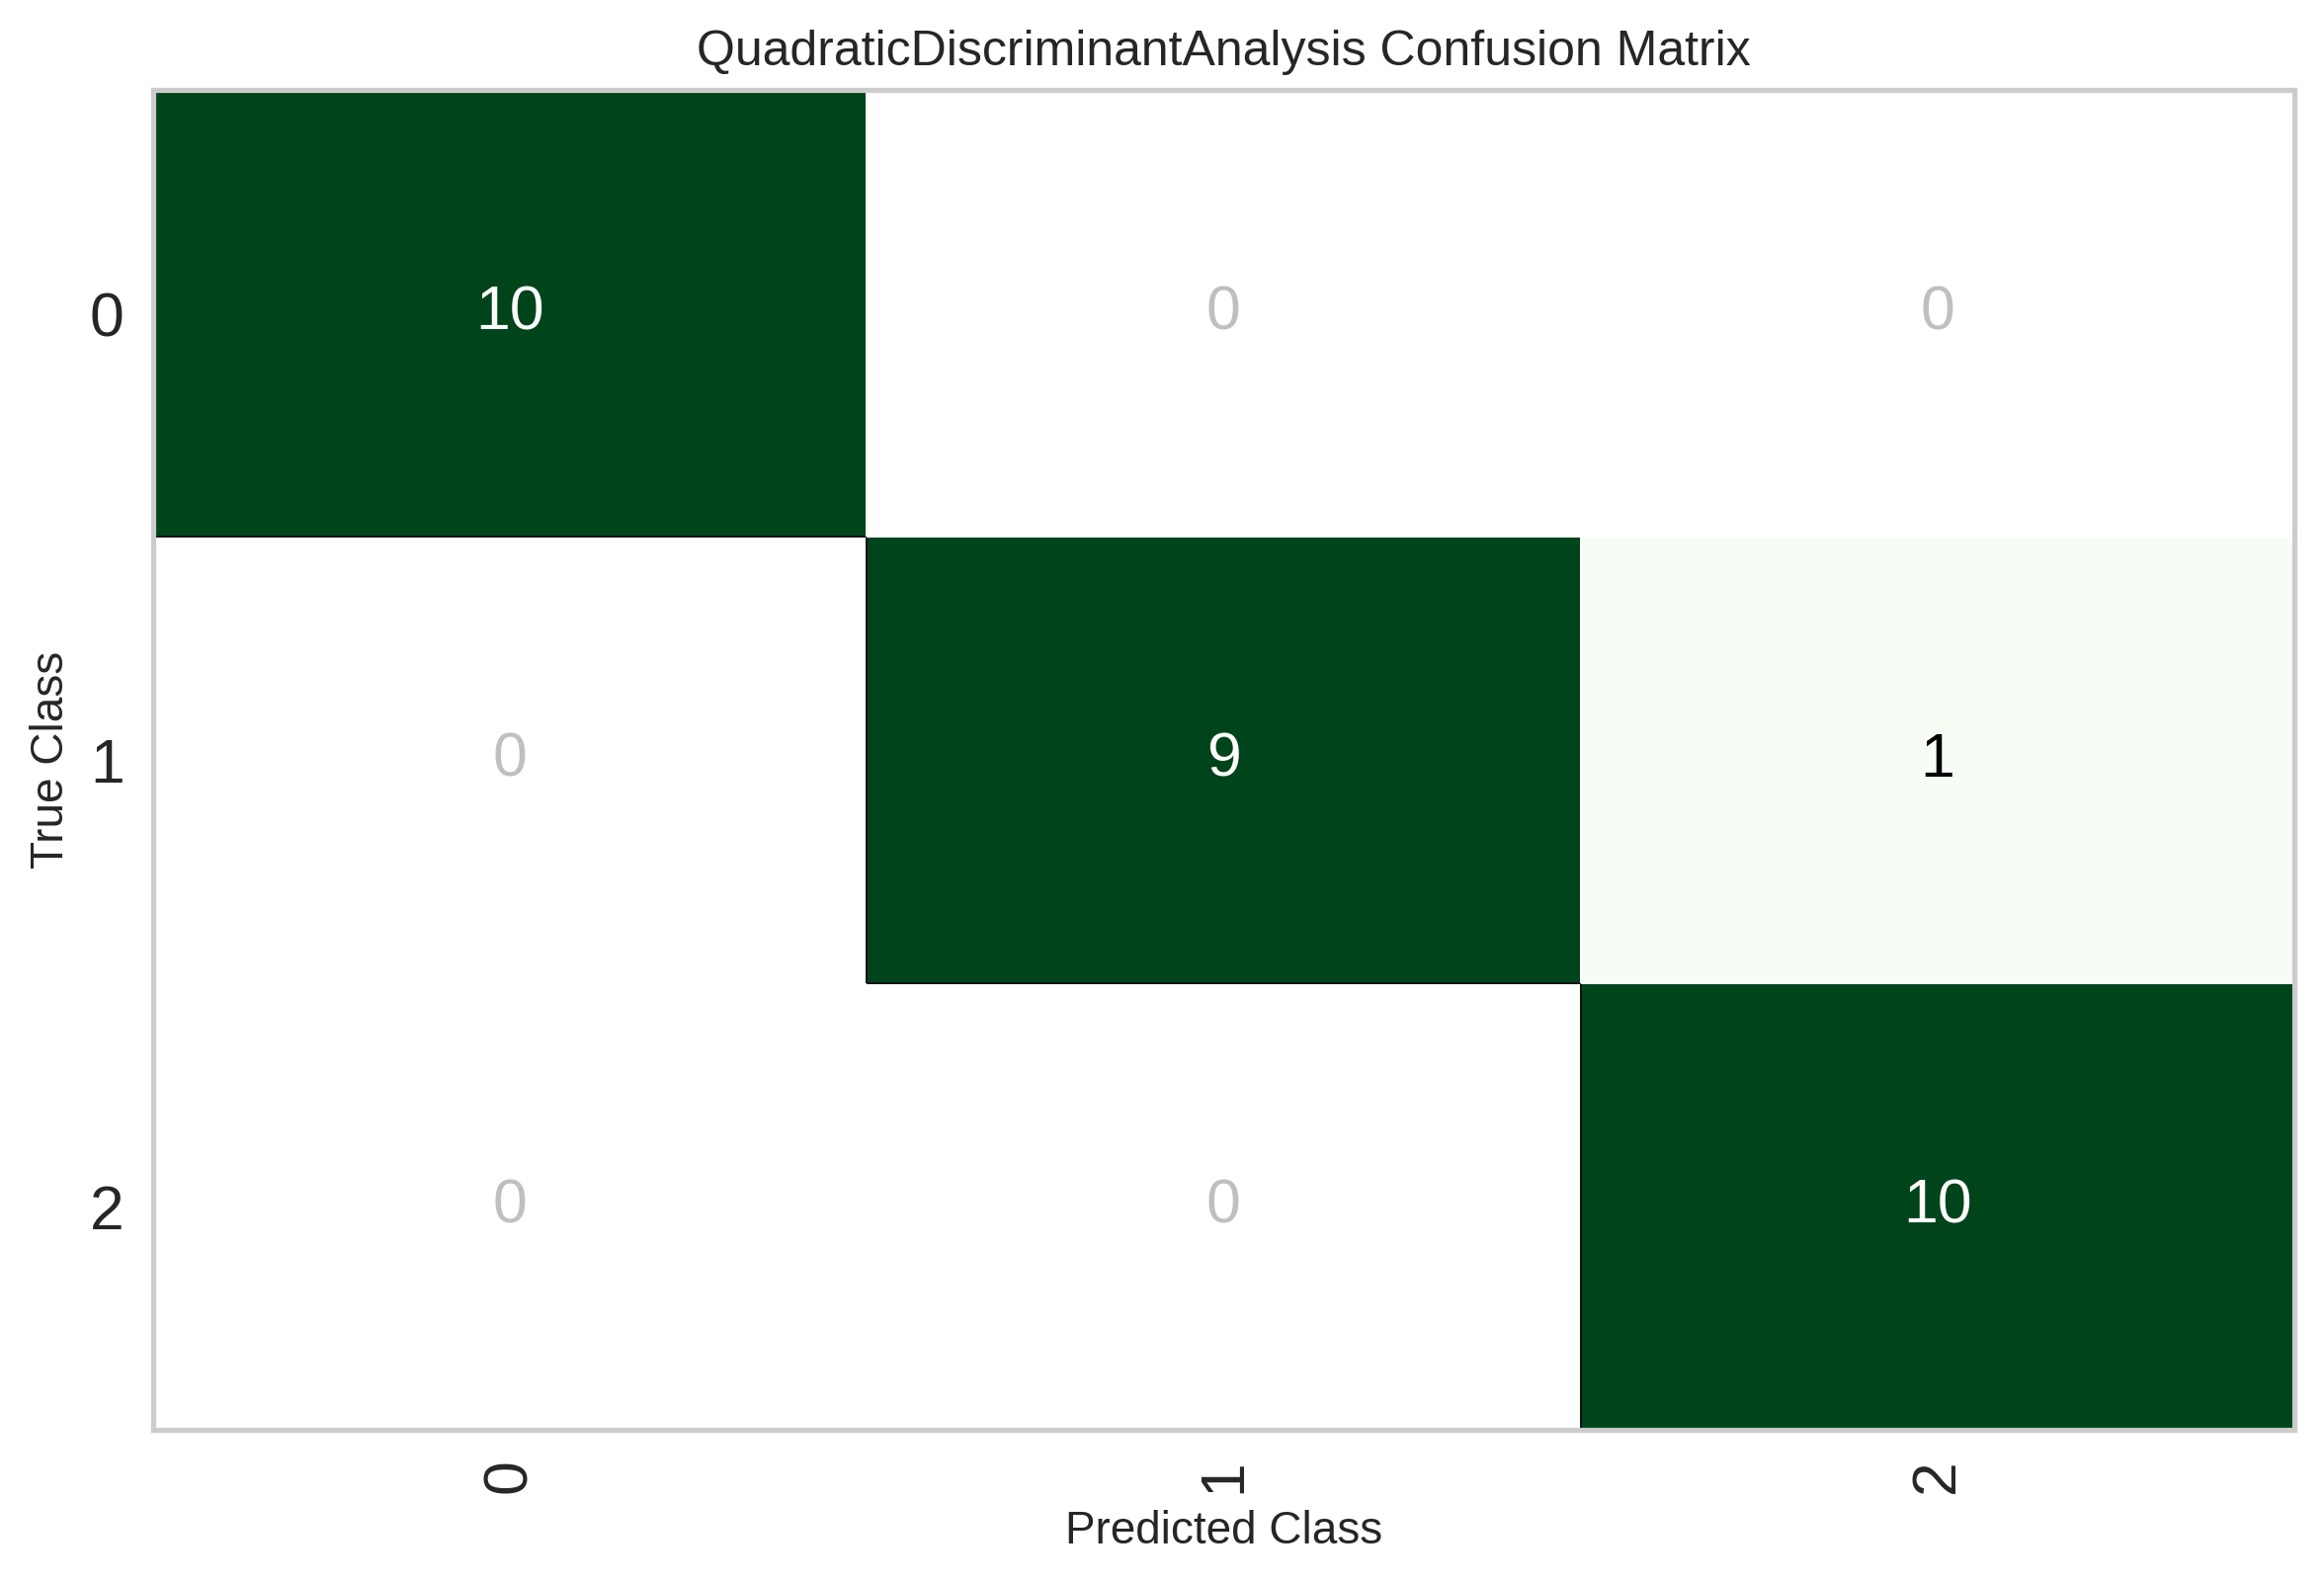

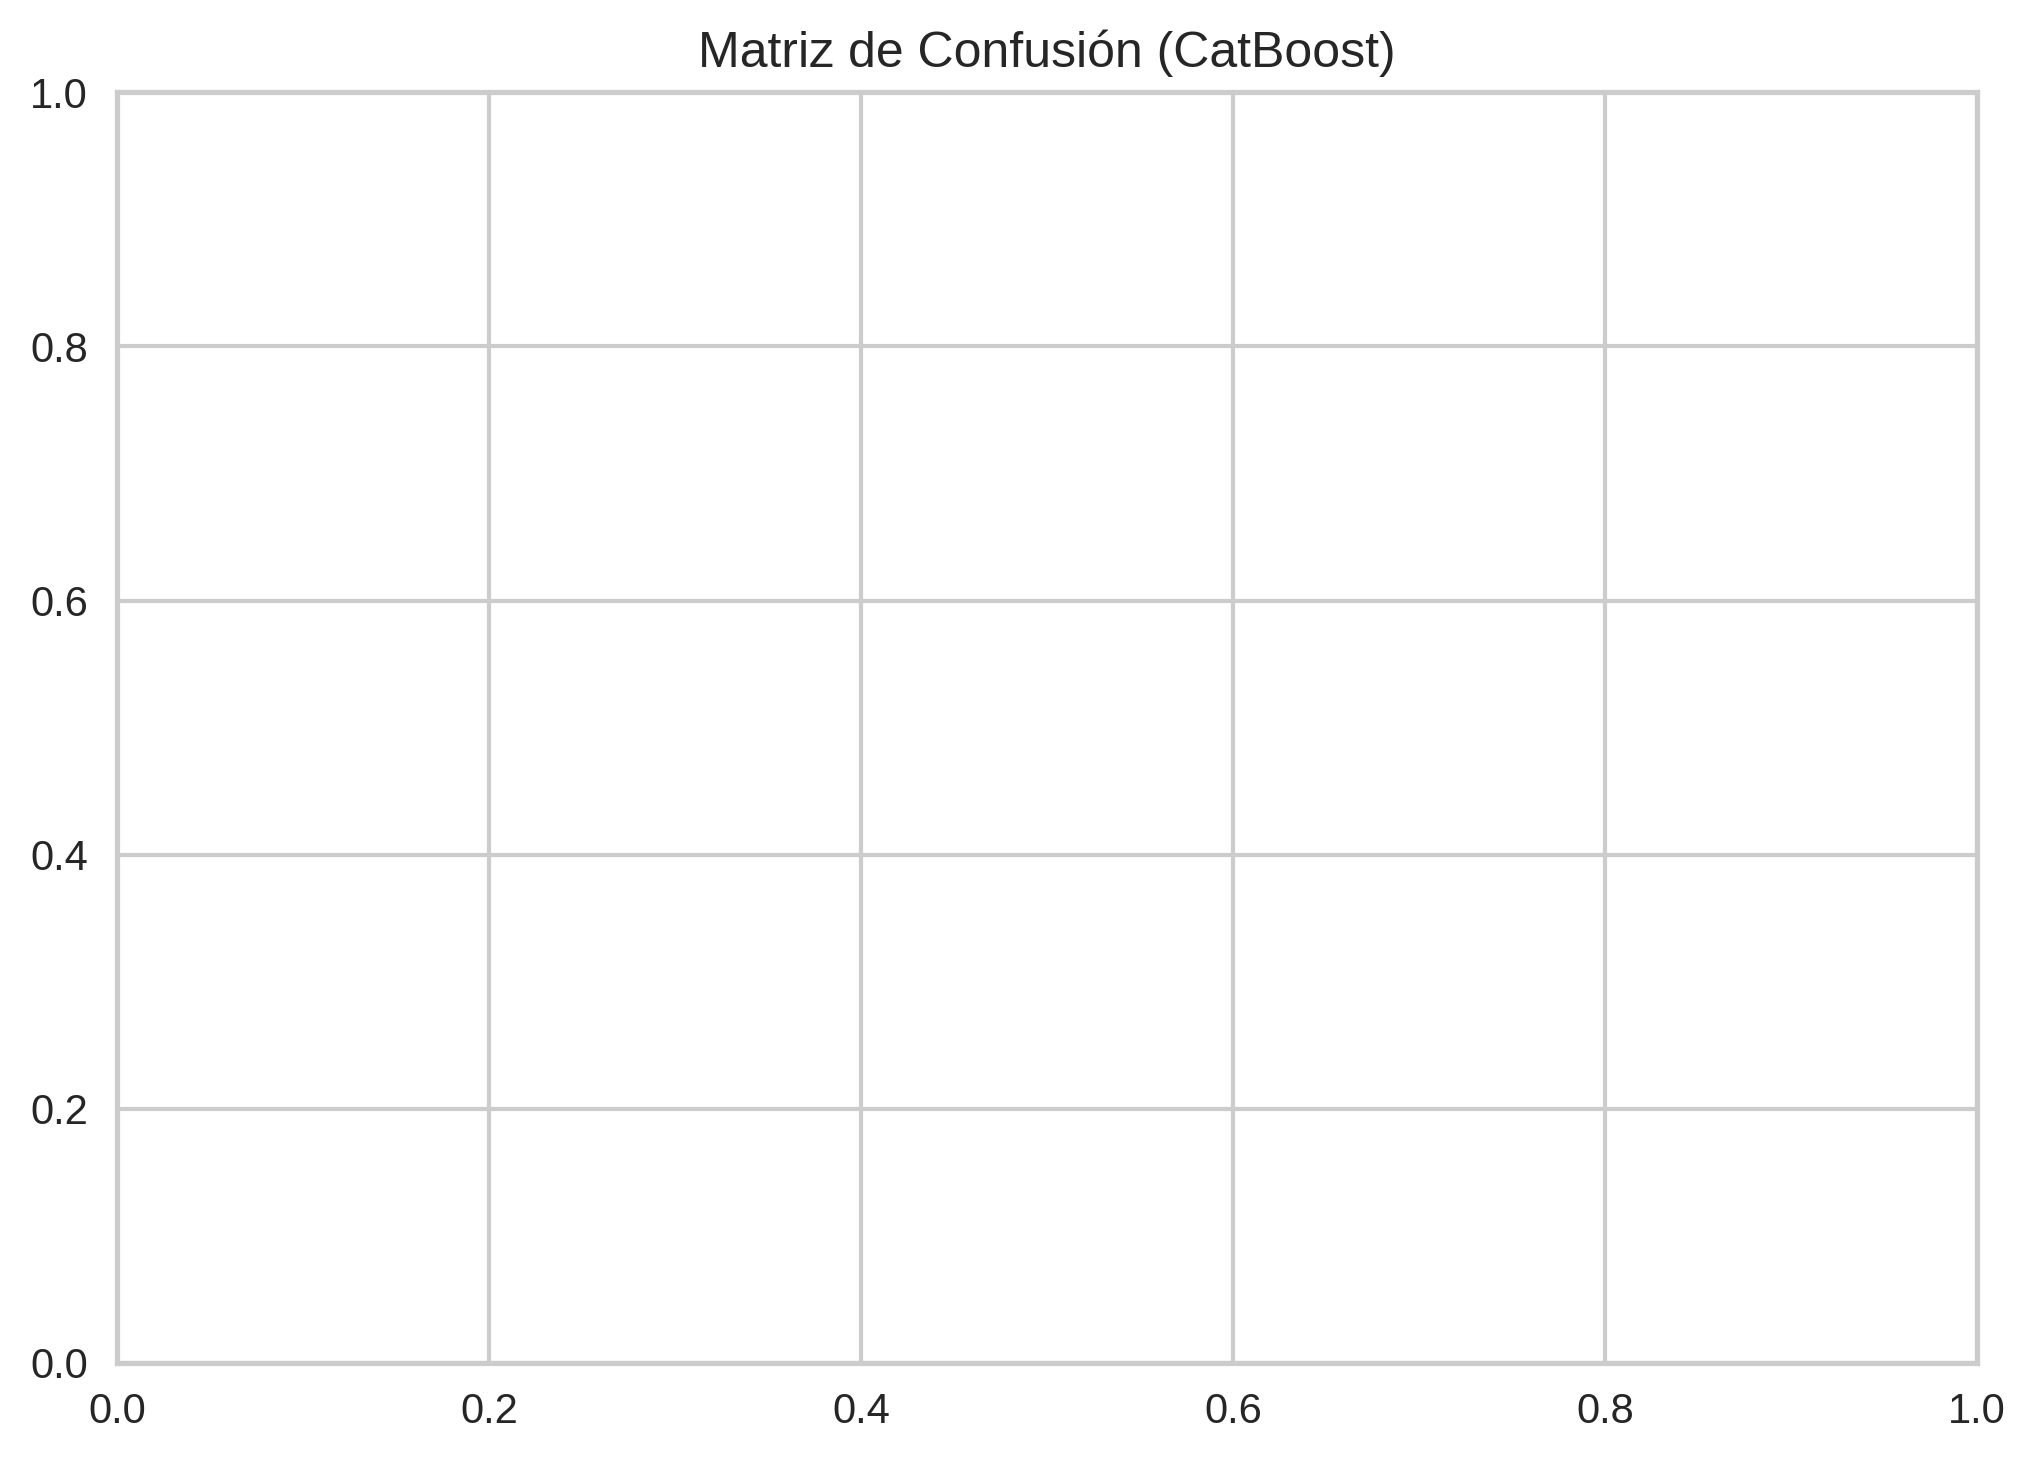

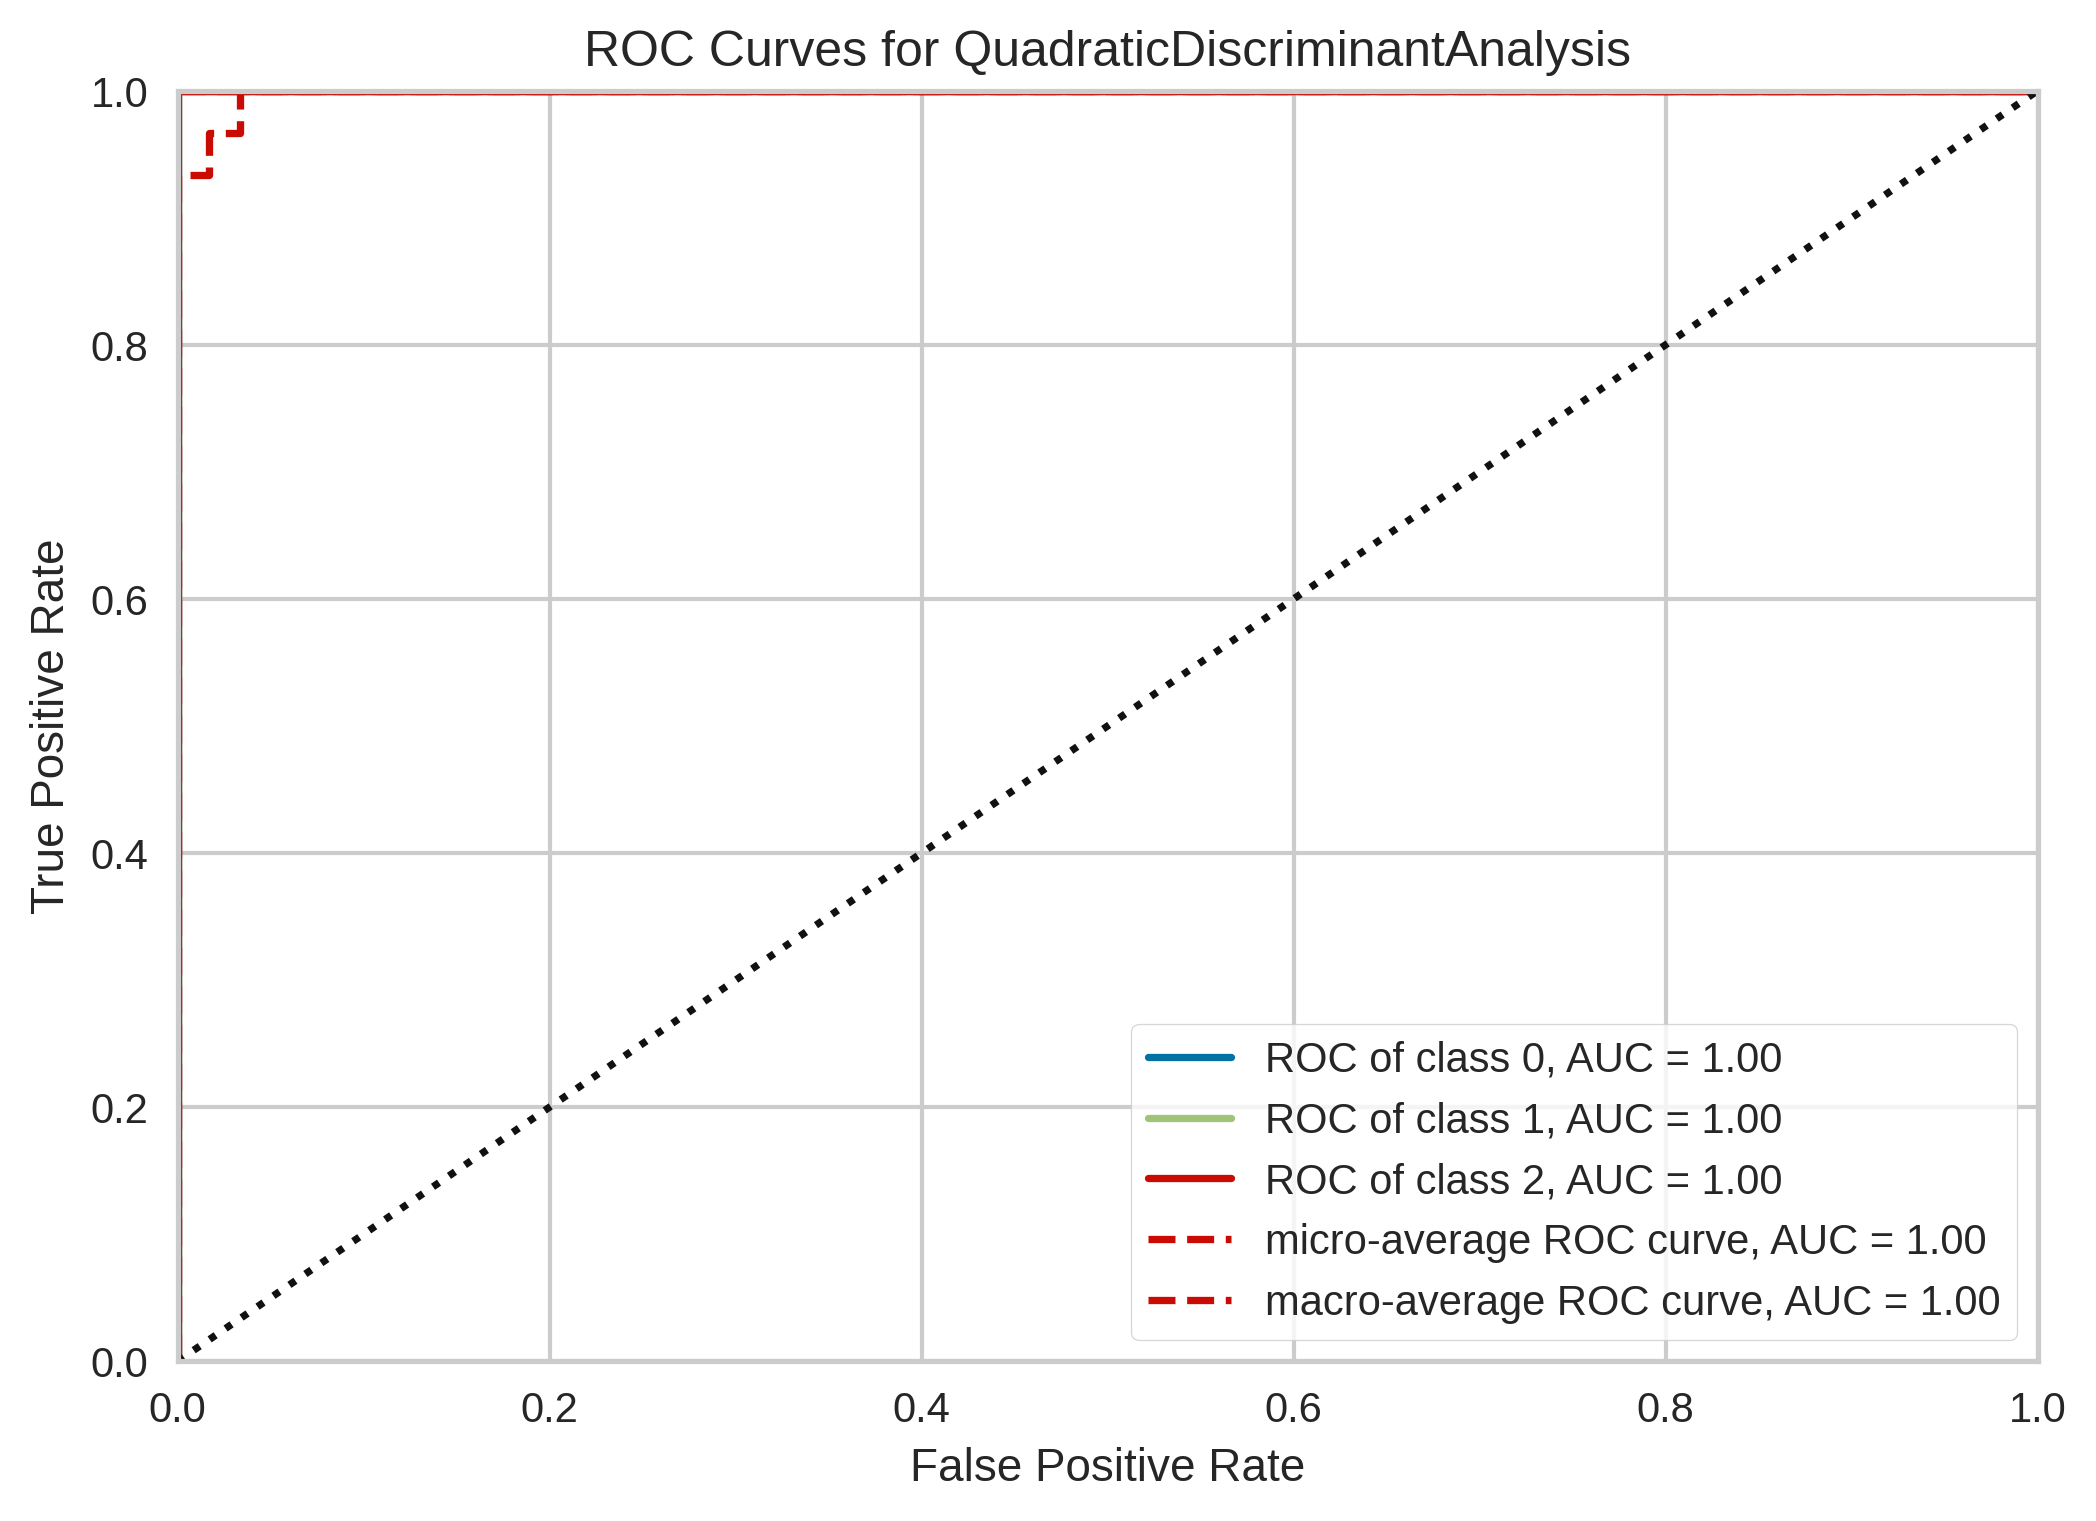

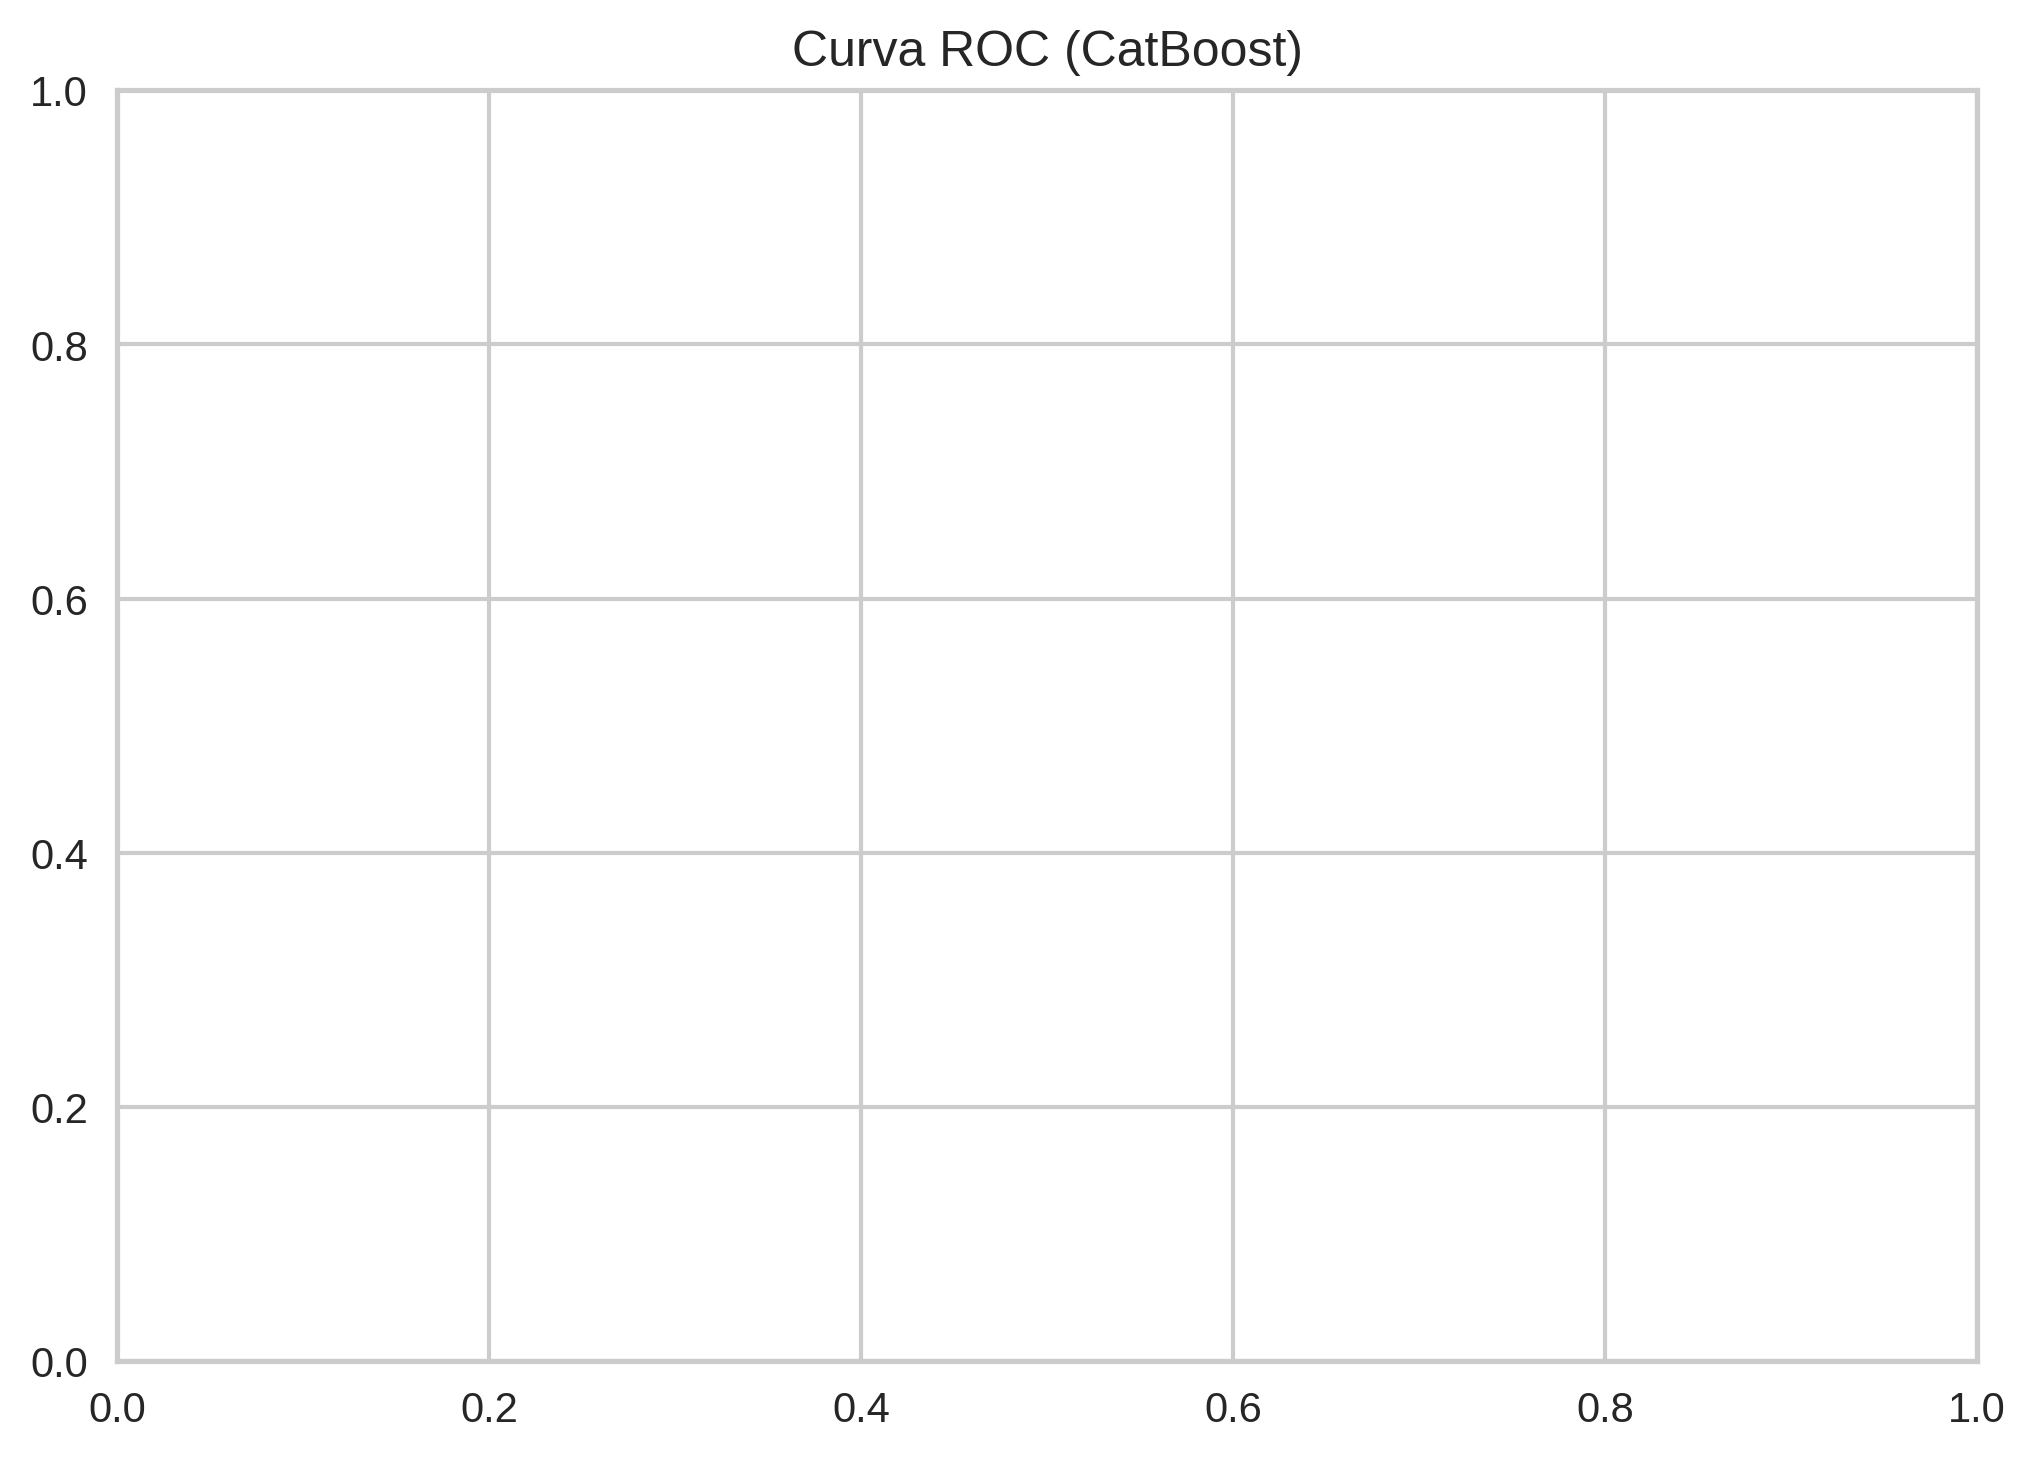

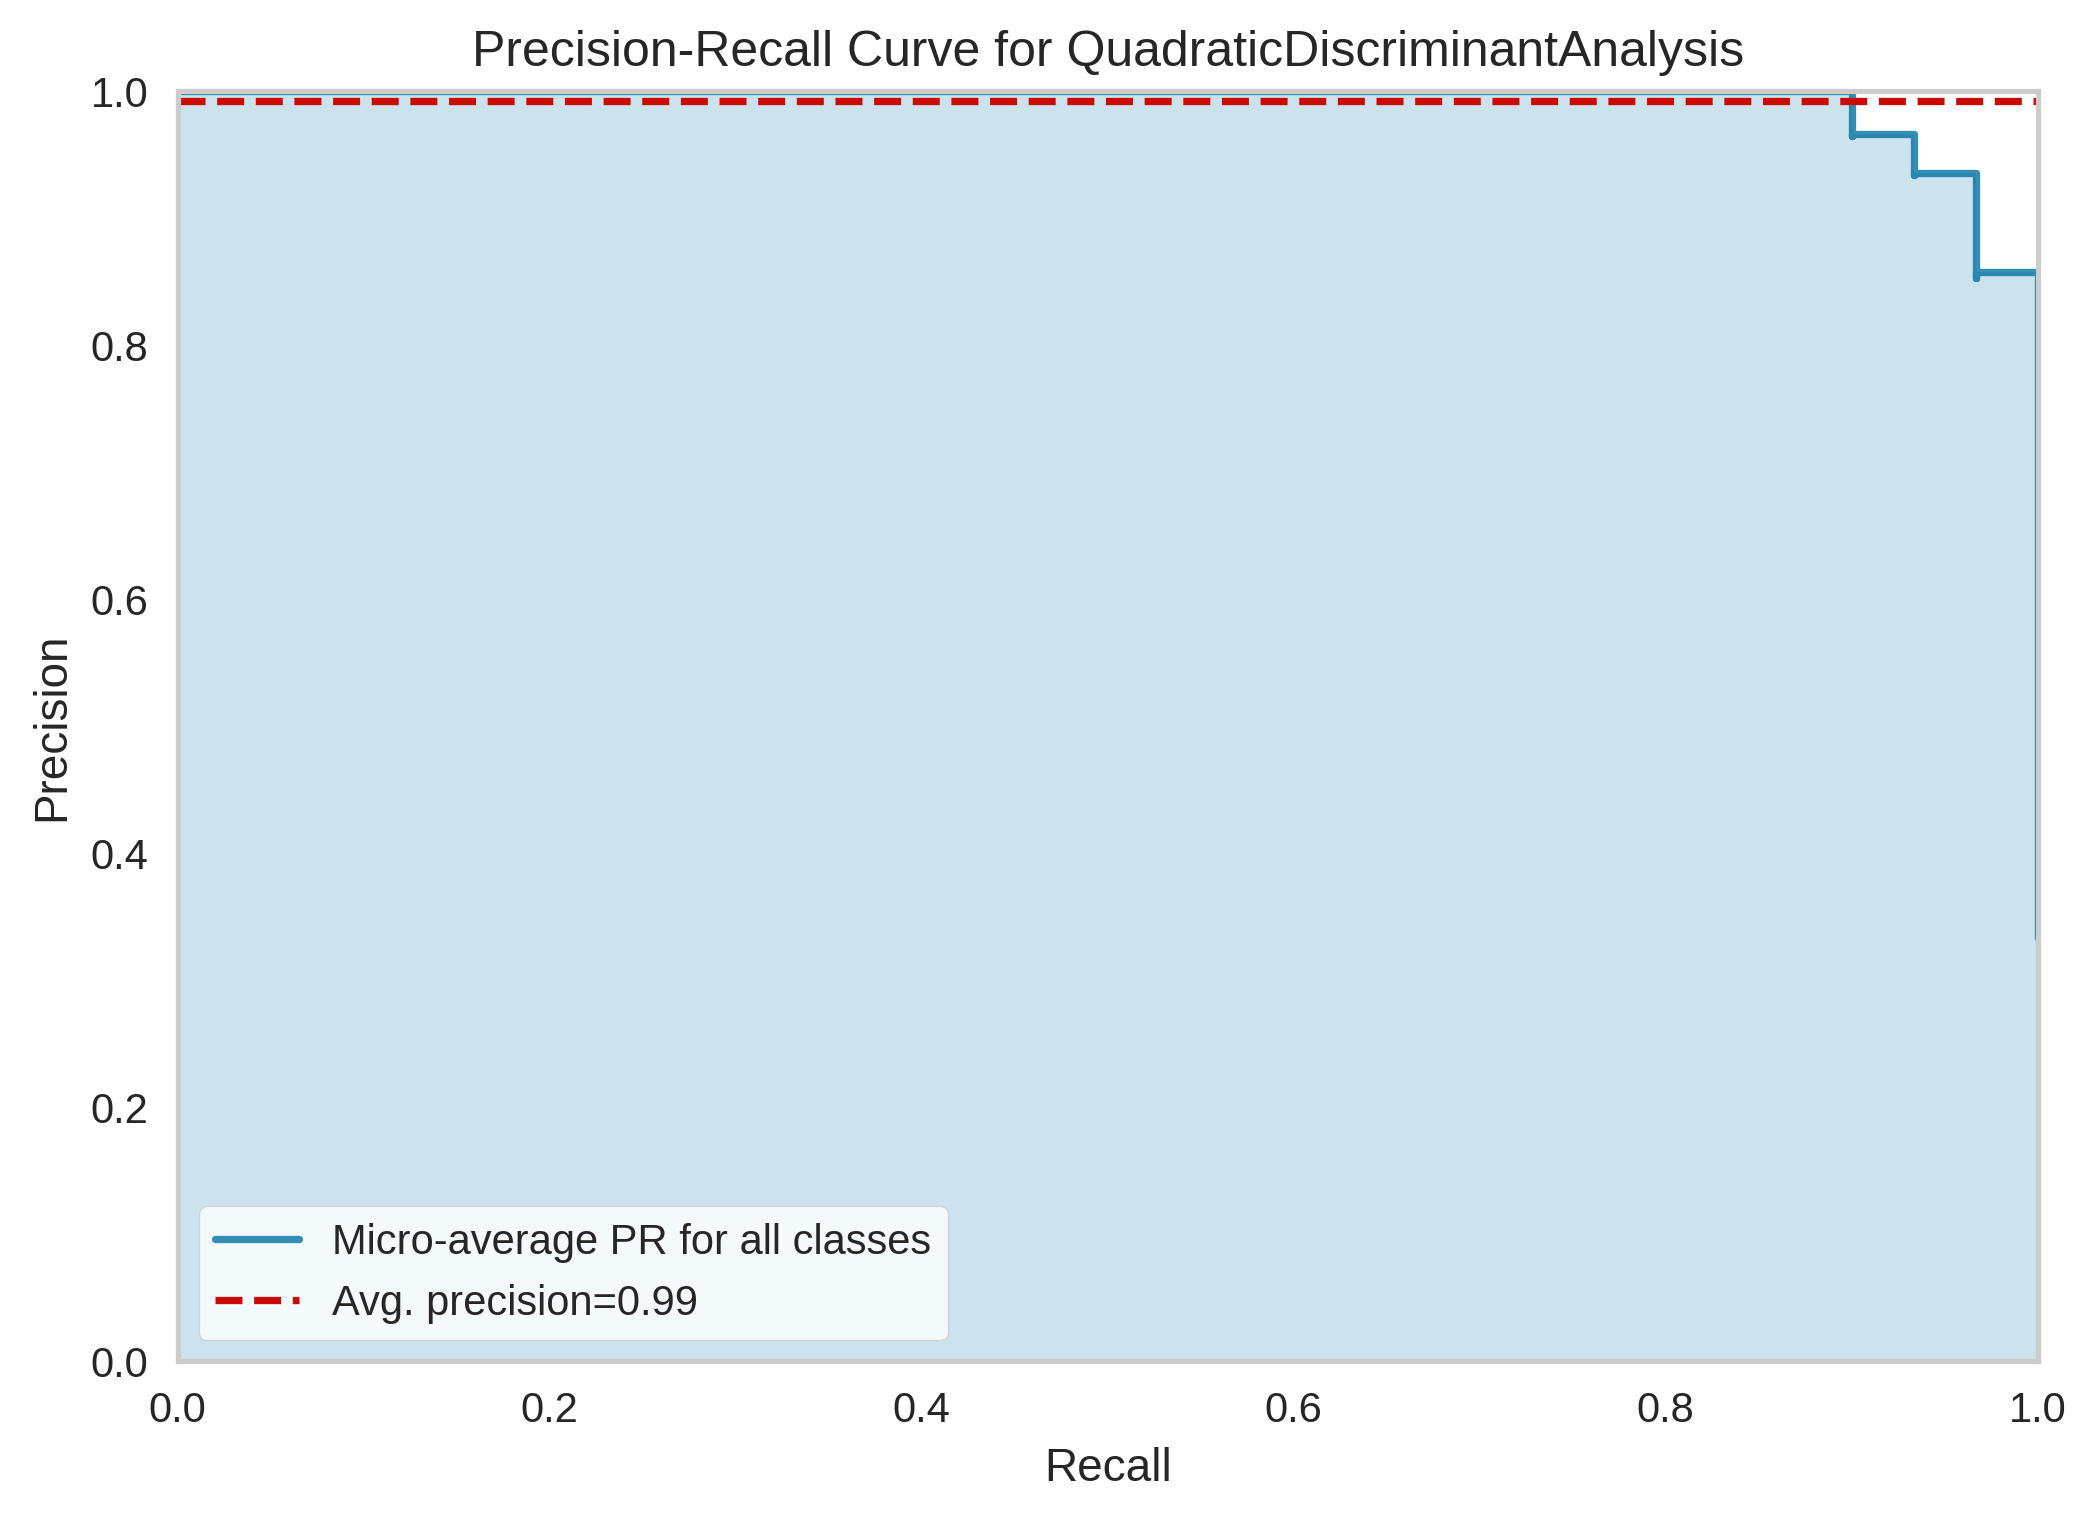

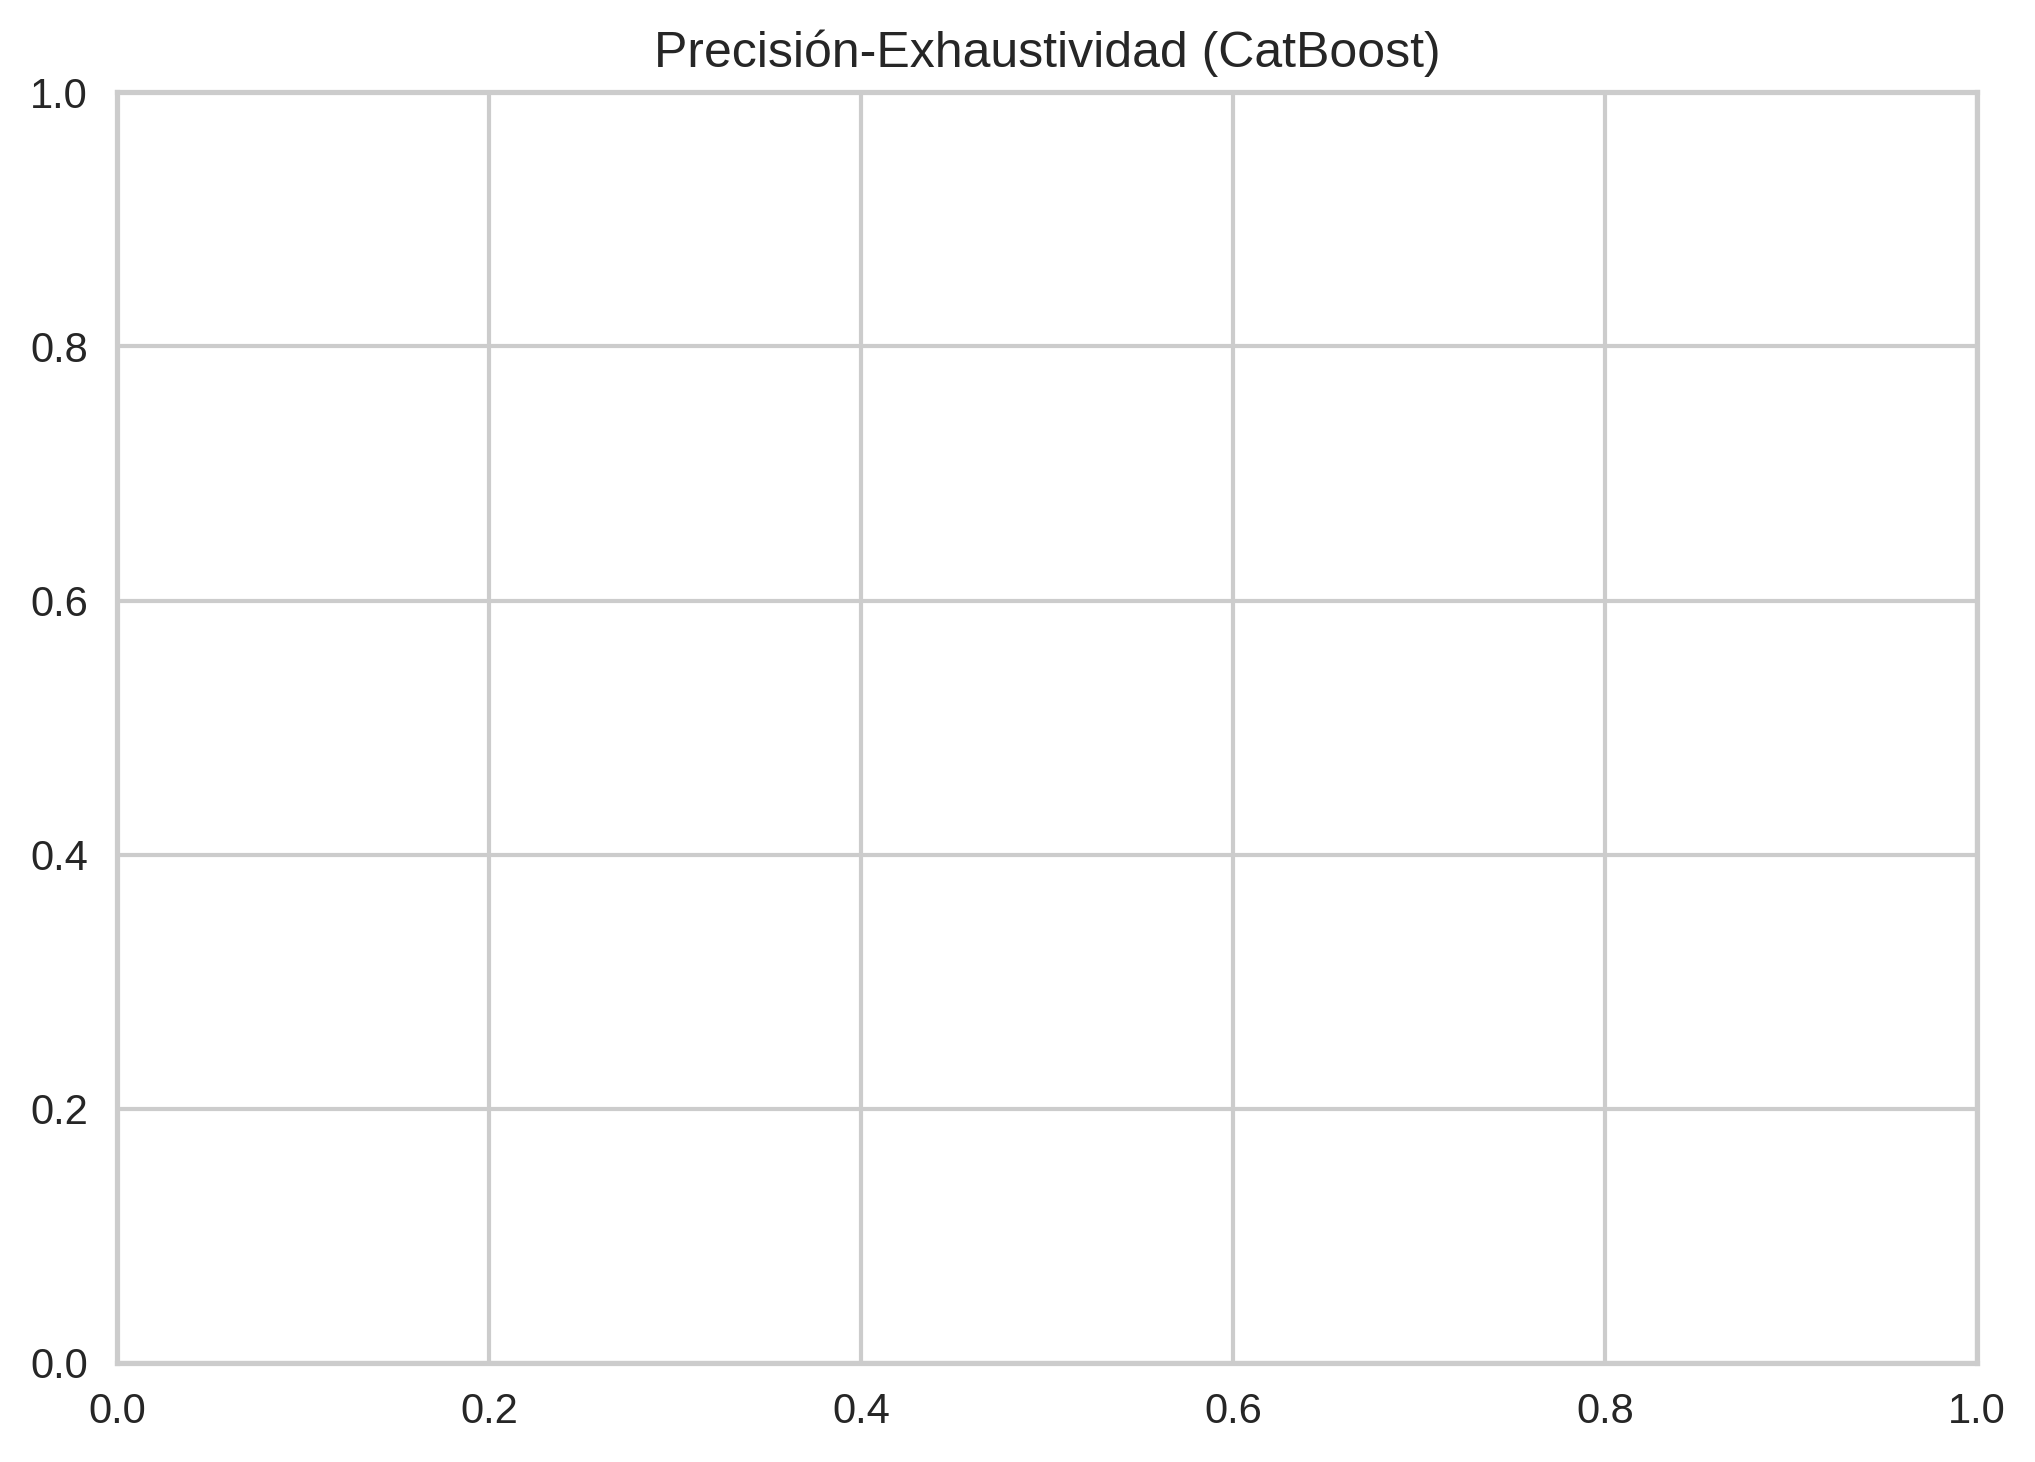

AttributeError: 'QuadraticDiscriminantAnalysis' object has no attribute 'get_feature_importance'

In [30]:
# prompt: crear graficos del algoritmo catboost con explicacion en español

plot_model(model_cat, plot = 'feature')
plt.title('Importancia de las Características (CatBoost)')
plt.show()

# Gráfico de la Matriz de Confusión
plot_model(tuned_model, plot = 'confusion_matrix')
plt.title('Matriz de Confusión (CatBoost)')
plt.show()

# Curva ROC
plot_model(tuned_model, plot = 'auc')
plt.title('Curva ROC (CatBoost)')
plt.show()

# Gráfico de precisión-exhaustividad
plot_model(tuned_model, plot = 'pr')
plt.title('Precisión-Exhaustividad (CatBoost)')
plt.show()


# Obtener la importancia de las características de CatBoost directamente
feature_importances = tuned_model.get_feature_importance()
feature_names = X_train.columns  # Reemplaza X_train con el nombre de tu conjunto de datos de entrenamiento

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características (CatBoost)')
plt.gca().invert_yaxis() # Invertir el eje y para mejor visualización
plt.show()


#  Evaluación del modelo
evaluate_model(tuned_model)

#Explicación de los gráficos:

#Importancia de las Características: Muestra qué tan influyente es cada característica en las predicciones del modelo. Las características con mayor importancia tienen un impacto más significativo en el resultado.

#Matriz de Confusión: Representa la precisión del modelo mostrando las predicciones correctas e incorrectas. Se utiliza para evaluar la precisión del modelo.

#Curva ROC: Evalúa el rendimiento del modelo en diferentes umbrales de clasificación.  Un AUC (área bajo la curva) mayor indica un mejor modelo.

#Gráfico de precisión-exhaustividad: Muestra la relación entre la precisión y la exhaustividad del modelo a diferentes umbrales.

#Evaluación del modelo: Proporciona una evaluación más exhaustiva del modelo incluyendo métricas como precisión, exhaustividad, F1, etc.


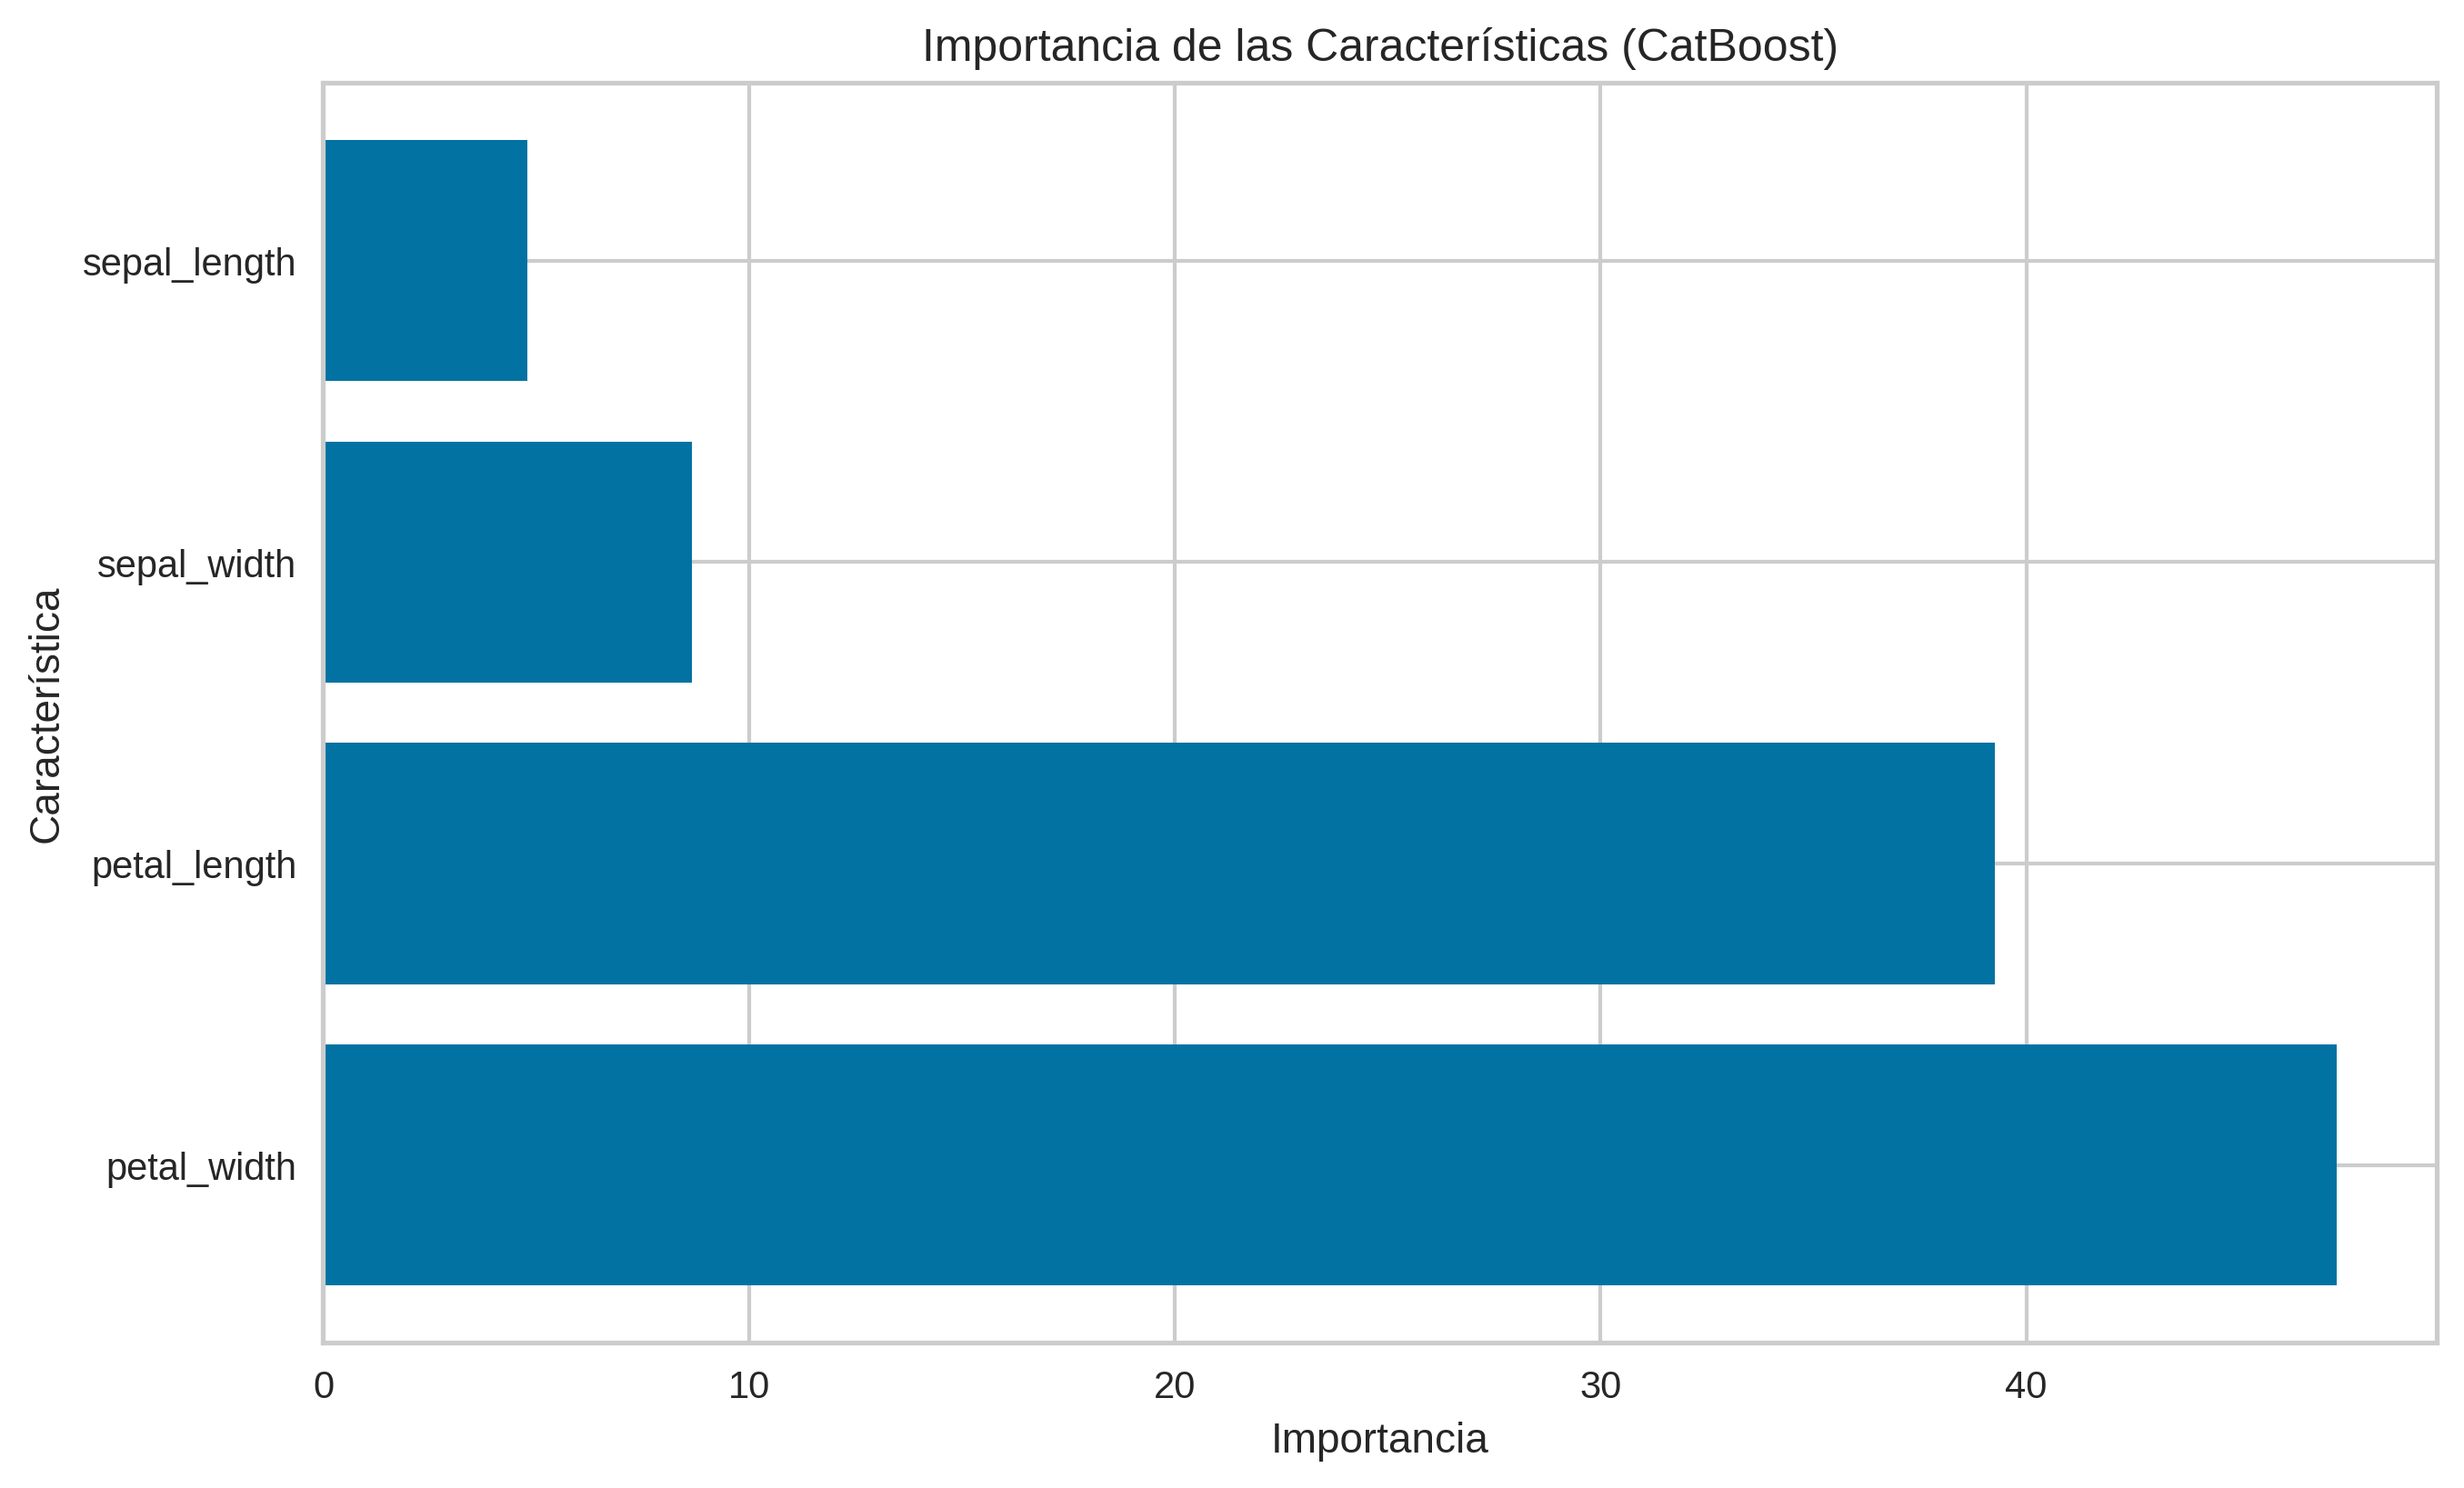

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
# prompt: profundizar los graficos del algoritmo model con explicacion en español

# ... (código anterior sin cambios)
feature_importances = model_cat.get_feature_importance() # changed from tuned_model to model_cat
# Asegúrate de que X_train esté definido. Si no lo está, puedes obtenerlo así:
X_train = get_config('X_train')
feature_names = X_train.columns

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características (CatBoost)')
plt.gca().invert_yaxis()  # Invertir el eje y para mejor visualización
plt.show()

#  Evaluación del modelo
evaluate_model(tuned_model)

# Explicación de los gráficos en español:

# 1. Importancia de las Características (CatBoost):
# Este gráfico muestra la importancia relativa de cada característica en el modelo CatBoost. La altura de cada barra representa la contribución de la característica a la predicción.  Las características más altas tienen mayor influencia en el modelo.  Esto es útil para entender qué variables son más relevantes para la clasificación y para posibles futuras reducciones de la dimensionalidad del dataset.


# 2. Matriz de Confusión (CatBoost y LDA):
# La matriz de confusión muestra el rendimiento del modelo en términos de predicciones correctas e incorrectas para cada clase.  Cada celda representa el número de instancias de una clase predicha como otra.  La diagonal principal muestra las predicciones correctas.  Esta matriz permite visualizar el tipo de errores que comete el modelo (falsos positivos, falsos negativos) y sirve para calcular métricas como la precisión, la exhaustividad y el F1-score.


# 3. Curva ROC (CatBoost):
# La curva ROC (Receiver Operating Characteristic) grafica la tasa de verdaderos positivos contra la tasa de falsos positivos para diferentes umbrales de clasificación. El área bajo la curva (AUC) es una métrica que resume el rendimiento del clasificador, donde un AUC de 1 representa un clasificador perfecto, y 0.5 representa un clasificador aleatorio.  Una curva ROC más cercana a la esquina superior izquierda indica un mejor rendimiento.


# 4. Precisión-Exhaustividad (CatBoost):
# Este gráfico muestra la relación entre la precisión y la exhaustividad del modelo a diferentes umbrales. La precisión mide la proporción de predicciones positivas que fueron correctas, mientras que la exhaustividad mide la proporción de instancias positivas que fueron correctamente identificadas.  Este gráfico es útil para encontrar el equilibrio entre precisión y exhaustividad que sea apropiado para el problema específico.


# 5. Evaluación del modelo (CatBoost):
# La función `evaluate_model` proporciona una interfaz interactiva para explorar el rendimiento del modelo a través de una variedad de métricas y visualizaciones. Proporciona un resumen completo del rendimiento del modelo, permitiendo un análisis más profundo de su desempeño en diferentes aspectos.
